In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'results.csv'
data = pd.read_csv(file_path)

# Display basic information and first few rows of the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   algorithmName          448 non-null    object 
 1   gridHash               448 non-null    object 
 2   nodesVisited           448 non-null    int64  
 3   movementsTaken         448 non-null    int64  
 4   optimalMovementsTaken  448 non-null    int64  
 5   solutionFound          448 non-null    bool   
 6   solutionGap            448 non-null    float64
 7   timeElapsed            448 non-null    int64  
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 25.1+ KB


In [51]:
algorithm_categories = {
    "B": "Breadth-first search",
    "I": "Iterative deepening search",
    "I1": "Iterative deepening search 1",
    "U": "Uniform-cost search",
    "A": "A* search (Manhattan)",
    "A1": "A* search (Euclidean)",
    "A2": "A* search (Correct Positions)",
    "G": "Greedy best-first (Depth)",
    "G1": "Greedy best-first (Manhattan)",
    "H": "Hill Climbing (Manhattan)",
    "HR": "Hill Climbing (Random Stochastic)",
    "HS1": "Hill Climbing (Simulated Annealing, Manhattan)",
    "HS2": "Hill Climbing (Simulated Annealing, Euclidean)",
    "HS3": "Hill Climbing (Simulated Annealing, Correctness)",
    "R": "RandomSearch"
}

data['algorithmCategory'] = data['algorithmName'].map(algorithm_categories)

data.head()

algorithmName   gridHash  nodesVisited  movementsTaken  \
0             B  12345678_             1               0   
1             I  12345678_             1               0   
2             U  12345678_             1               0   
3             A  12345678_             1               0   
4            A1  12345678_             1               0   

   optimalMovementsTaken  solutionFound  solutionGap  timeElapsed  \
0                      0           True          0.0      2815000   
1                      0           True          0.0        37000   
2                      0           True          0.0      2065900   
3                      0           True          0.0       491900   
4                      0           True          0.0        17000   

            algorithmCategory  
0        Breadth-first search  
1  Iterative deepening search  
2         Uniform-cost search  
3       A* search (Manhattan)  
4       A* search (Euclidean)

In [52]:
# Grouping by algorithm name and calculating mean for the relevant columns
avg_metrics = data.groupby("algorithmName")[["nodesVisited", "movementsTaken", "timeElapsed", "solutionGap"]].mean()

# Sorting the values for better visualization
avg_metrics_sorted = avg_metrics.sort_values(by="timeElapsed")

avg_metrics_sorted


nodesVisited  movementsTaken   timeElapsed  solutionGap
algorithmName                                                         
HS1                 4.93750         3.93750  2.908438e+04     0.694688
HR                  4.15625         3.15625  3.441562e+04     0.573438
H                   4.06250         3.06250  4.329688e+04     0.597187
HS2                30.12500        29.12500  5.825312e+04     1.406875
HS3                41.15625        40.15625  6.647500e+04     1.872812
G1                134.75000        38.93750  5.020031e+05     1.125312
R                 263.25000       262.25000  1.362612e+06    24.755937
A                1196.81250        15.50000  4.370250e+06     0.000000
A1               3415.15625        15.50000  1.686311e+07     0.000000
B               48981.87500        15.50000  5.876523e+07     0.000000
A2              22862.87500        15.50000  1.487912e+08     0.000000
G              125724.18750        15.50000  2.110485e+08     0.000000
U              125724.18750        15.50000  2.293106e+08     0.000000
I              323509.46875        18.93750  2.385753e+08     0.141250

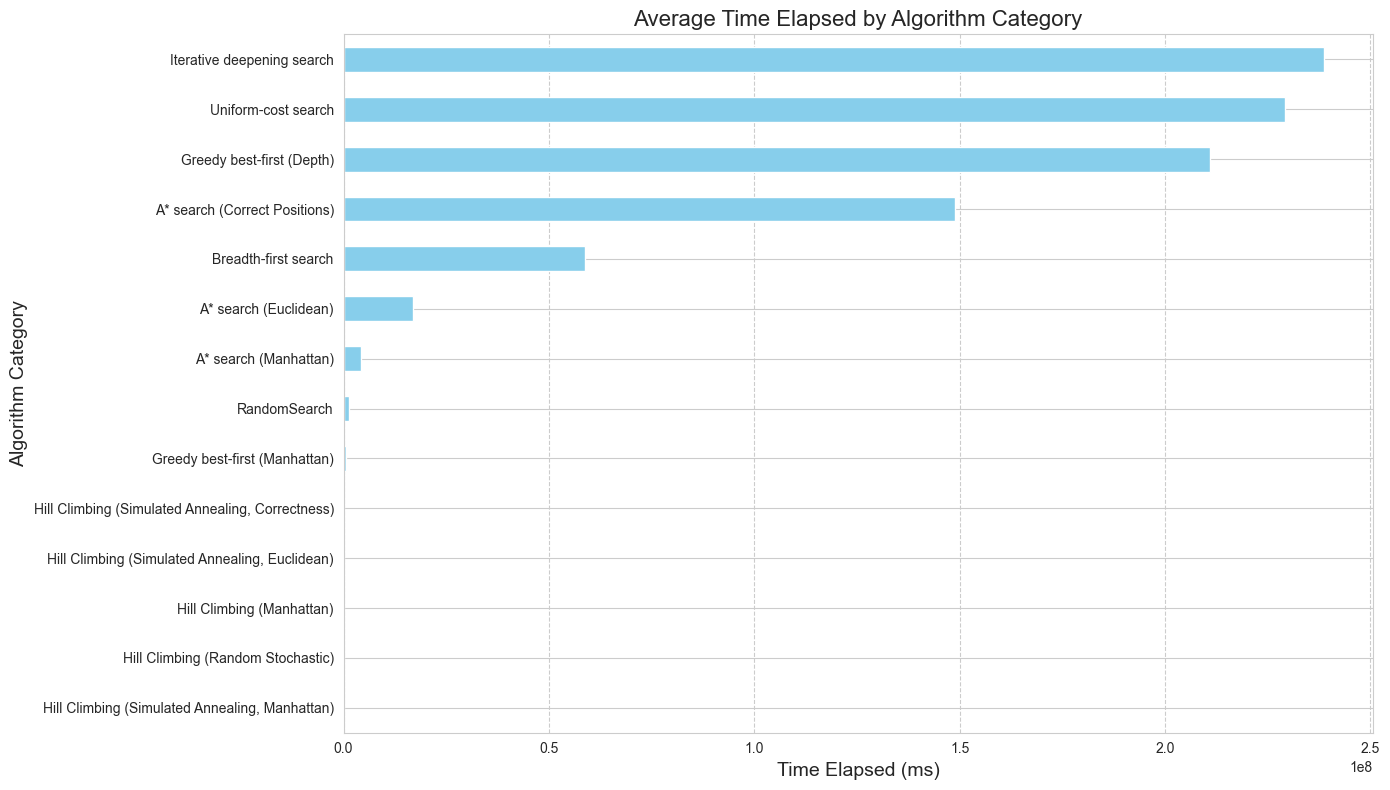

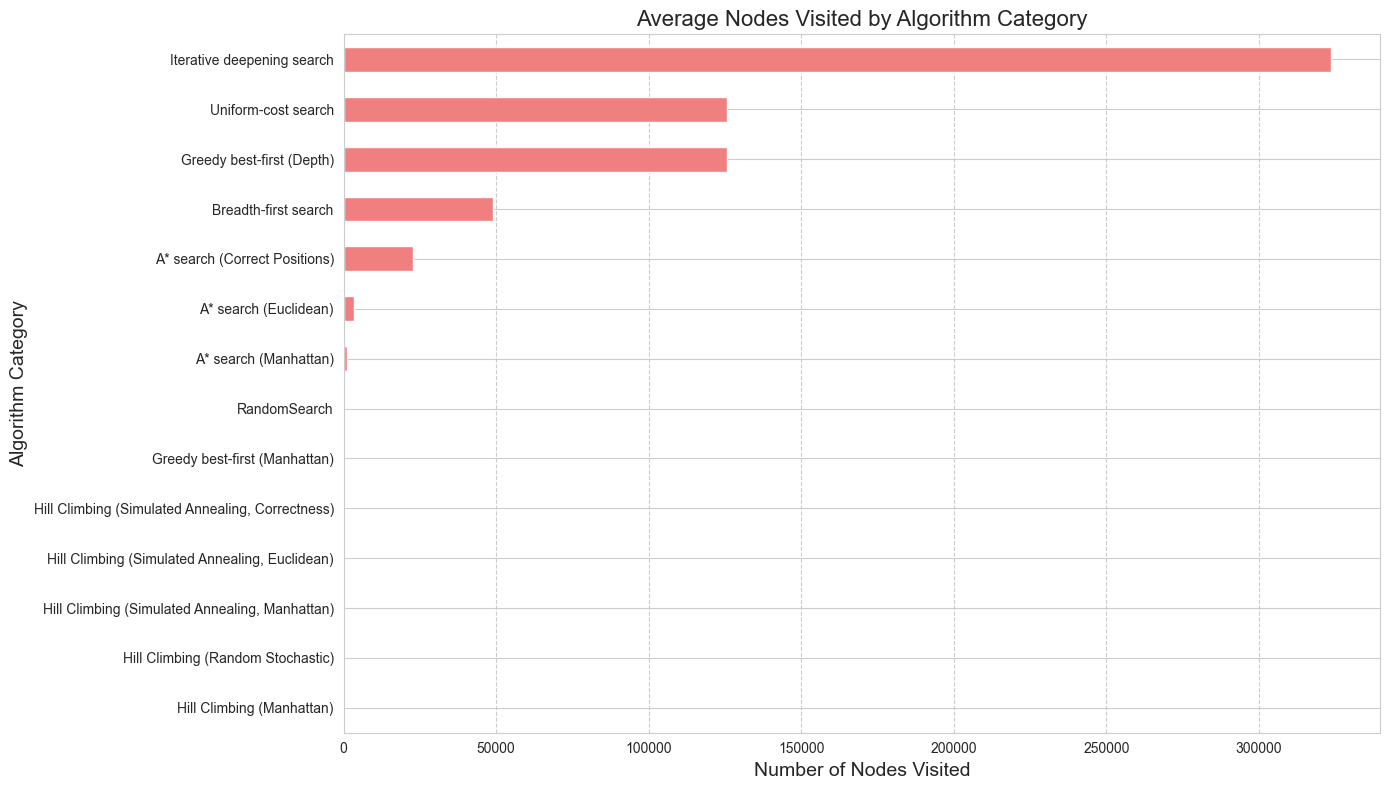

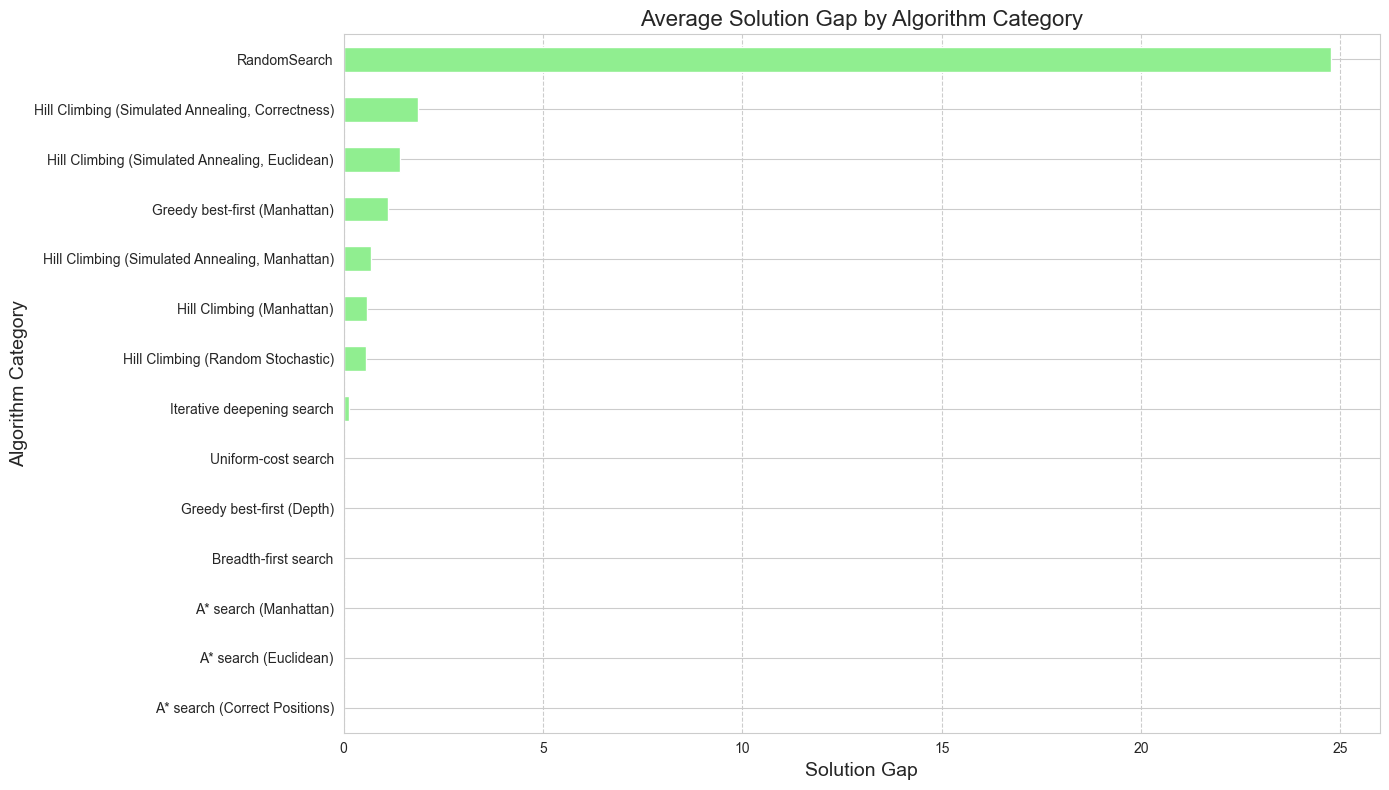

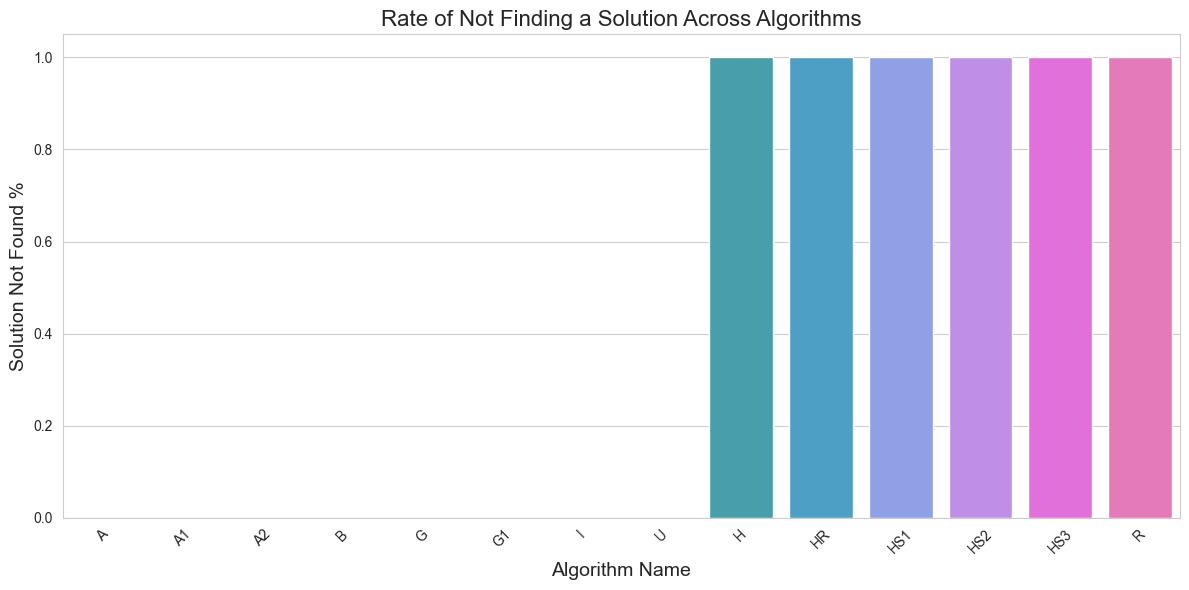

In [54]:
def plot_nodes_visited(data_original, title_suffix=""):
    avg_nodes_visited = data_original.groupby("algorithmCategory")["nodesVisited"].mean().sort_values()

    # Plot the average nodes visited for each algorithm category
    plt.figure(figsize=(14, 8))
    avg_nodes_visited.plot(kind='barh', color='lightcoral')
    plt.title(f'Average Nodes Visited by Algorithm Category{title_suffix}', fontsize=16)
    plt.xlabel('Number of Nodes Visited', fontsize=14)
    plt.ylabel('Algorithm Category', fontsize=14)
    plt.grid(axis='x', linestyle='--')
    plt.tight_layout()
    plt.show()


def plot_solution_gap(data_original, title_suffix=""):
    avg_solution_gap = data_original.groupby("algorithmCategory")["solutionGap"].mean().sort_values()

    plt.figure(figsize=(14, 8))
    avg_solution_gap.plot(kind='barh', color='lightgreen')
    plt.title(f'Average Solution Gap by Algorithm Category{title_suffix}', fontsize=16)
    plt.xlabel('Solution Gap', fontsize=14)
    plt.ylabel('Algorithm Category', fontsize=14)
    plt.grid(axis='x', linestyle='--')
    plt.tight_layout()
    plt.show()


def plot_time_elapsed(data_original, title_suffix=""):
    avg_time_elapsed = data_original.groupby("algorithmCategory")["timeElapsed"].mean().sort_values()

    # Plot the average time elapsed for each algorithm category
    plt.figure(figsize=(14, 8))
    avg_time_elapsed.plot(kind='barh', color='skyblue')
    plt.title(f'Average Time Elapsed by Algorithm Category{title_suffix}', fontsize=16)
    plt.xlabel('Time Elapsed (ms)', fontsize=14)
    plt.ylabel('Algorithm Category', fontsize=14)
    plt.grid(axis='x', linestyle='--')
    plt.tight_layout()
    plt.show()


def plot_solution_found_rate(data_original, title_suffix=""):
    data_grouped = data_original.groupby("algorithmName")[
        ["nodesVisited", "movementsTaken", "timeElapsed", "solutionGap", "solutionFound"]].mean()
    data_grouped["solutionFound"] = data_grouped["solutionFound"].astype(int)
    data_grouped["solutionFound"] = 1 - data_grouped["solutionFound"]
    solution_found_rate = data_grouped.groupby("algorithmName")["solutionFound"].mean().sort_values()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=solution_found_rate.index, y=solution_found_rate, hue=solution_found_rate.index)
    plt.title(f'Rate of Not Finding a Solution Across Algorithms{title_suffix}', fontsize=16)
    plt.xlabel('Algorithm Name', fontsize=14)
    plt.ylabel('Solution Not Found %', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def show_plots(data_original, title_suffix=""):
    avg_metrics_new = data_original.groupby("algorithmName")[
        ["nodesVisited", "movementsTaken", "timeElapsed", "solutionGap"]].mean()

    # Sorting the values for better visualization
    avg_metrics_new = avg_metrics_new.sort_values(by="timeElapsed")

    plot_time_elapsed(data_original, title_suffix)
    plot_nodes_visited(data_original, title_suffix)
    plot_solution_gap(data_original, title_suffix)
    plot_solution_found_rate(data_original, title_suffix)


show_plots(data)

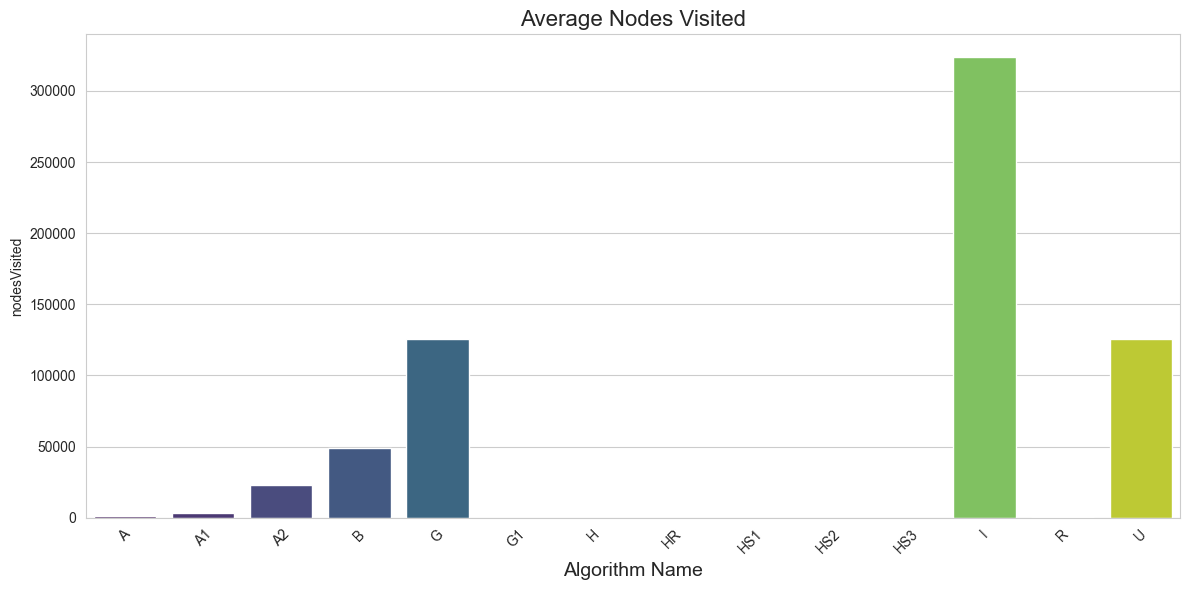

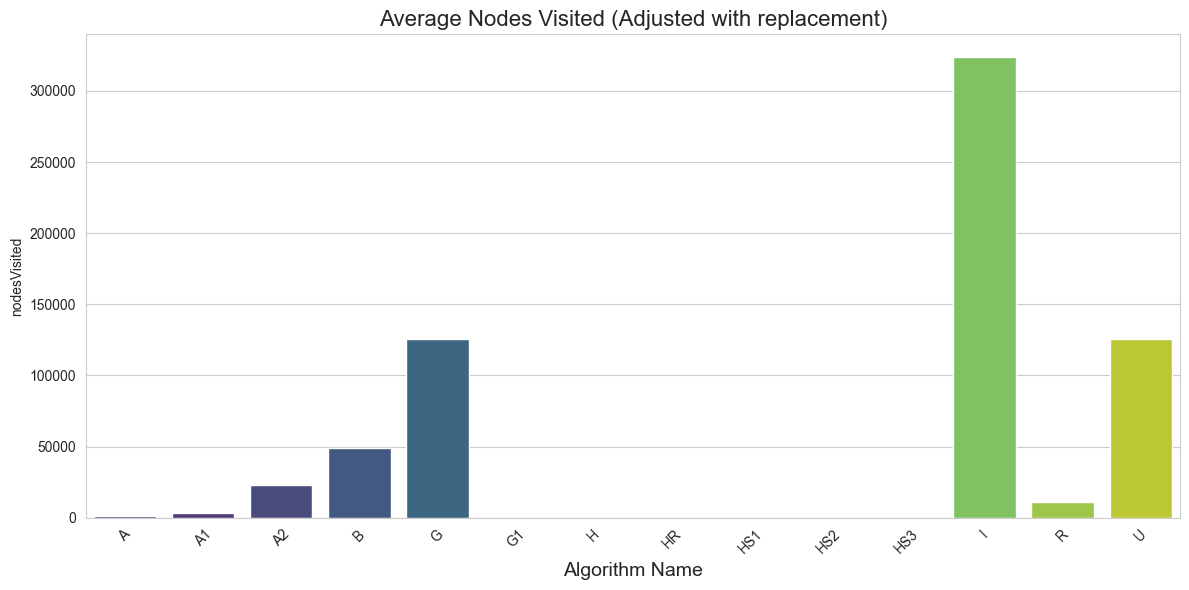

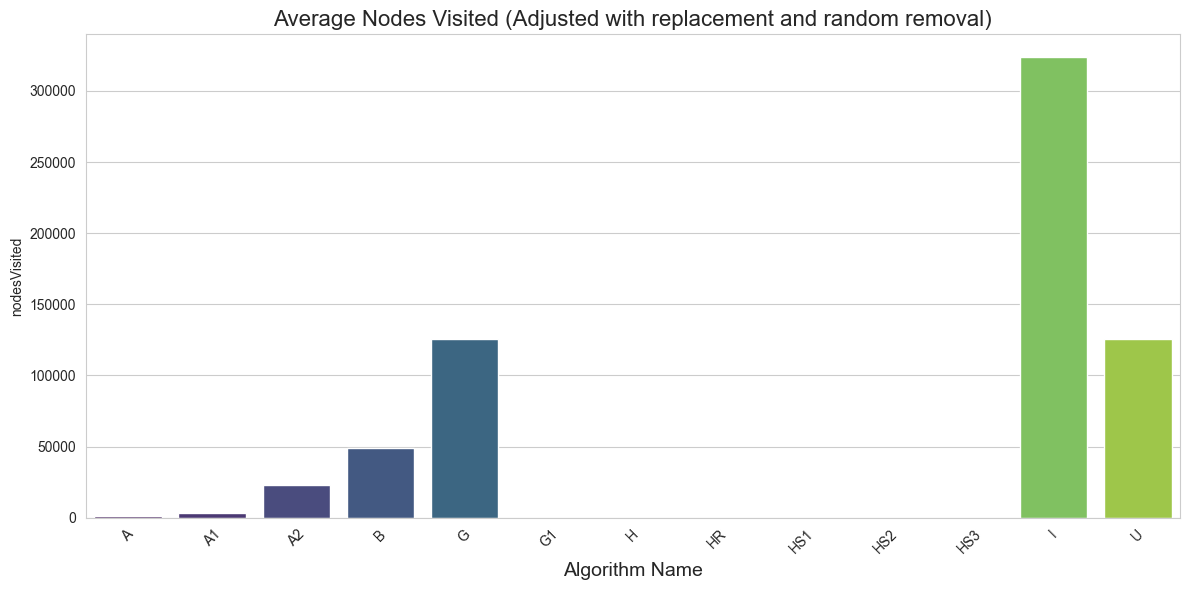

In [45]:
# Identify unsuccessful attempts
def replace_data_with_mean(data_original):
    unsuccessful_attempts = data_original[~data_original["solutionFound"]]

    # For each unsuccessful attempt, calculate the mean 'timeElapsed', 'nodesVisited', 
    # and the maximum mean 'solutionGap' of all algorithms that found a solution 
    # for that specific grid instance
    replacement_values = {}
    for _, row in unsuccessful_attempts.iterrows():
        grid_hash = row["gridHash"]
        successful_attempts = data_original[(data_original["gridHash"] == grid_hash) & data_original["solutionFound"]]

        mean_time = successful_attempts["timeElapsed"].mean()
        mean_nodes = successful_attempts["nodesVisited"].mean()

        max_gap_algorithm = successful_attempts.groupby("algorithmName")["solutionGap"].mean().idxmax()

        # Get the maximum mean gap value
        max_mean_gap = successful_attempts[successful_attempts["algorithmName"] == max_gap_algorithm][
            "solutionGap"].mean()

    replacement_values[row.name] = {
        "mean_time": mean_time,
        "mean_nodes": mean_nodes,
        "max_mean_gap": max_mean_gap
    }

    # Create a copy of the data to preserve the original data for comparison
    data_adjusted = data_original.copy()

    # Replace the 'timeElapsed', 'nodesVisited', and 'solutionGap' 
    # for unsuccessful attempts with the calculated values
    for idx, values in replacement_values.items():
        data_adjusted.loc[idx, "timeElapsed"] = int(values["mean_time"])
        data_adjusted.loc[idx, "nodesVisited"] = int(values["mean_nodes"])
        data_adjusted.loc[idx, "solutionGap"] = int(values["max_mean_gap"])

    return data_adjusted


# Display adjusted data and original data for comparison
#data_adjusted.iloc[list(replacement_values.keys())].head(), data.iloc[list(replacement_values.keys())].head()
data_adjusted = replace_data_with_mean(data)
data_no_R = data[data["algorithmName"] != "R"]
data_adjusted_no_R = replace_data_with_mean(data_no_R)

title_suffix1 = " (Adjusted with replacement)"
title_suffix2 = " (Adjusted with replacement and random removal)"


def compare_plots(data_full, data_adjusted, data_no_r, func=plot_nodes_visited):
    title_suffix1 = " (Adjusted with replacement)"
    title_suffix2 = " (Adjusted with replacement and random removal)"

    func(data_full, "")
    func(data_adjusted, title_suffix1)
    func(data_no_r, title_suffix2)


compare_plots(data, data_adjusted, data_no_R, plot_nodes_visited)


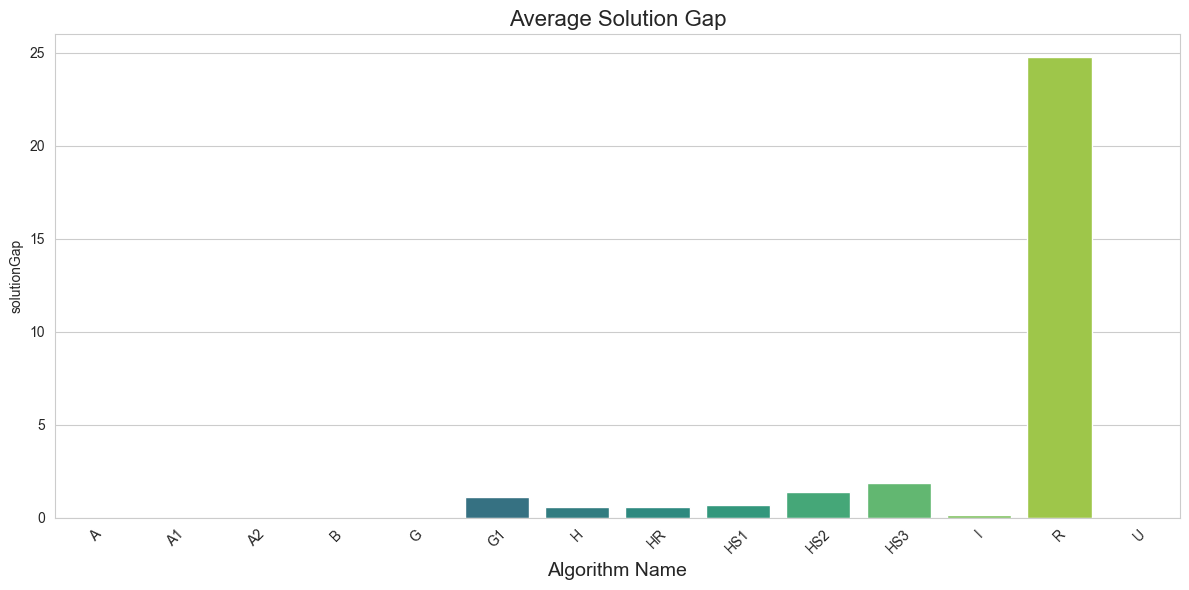

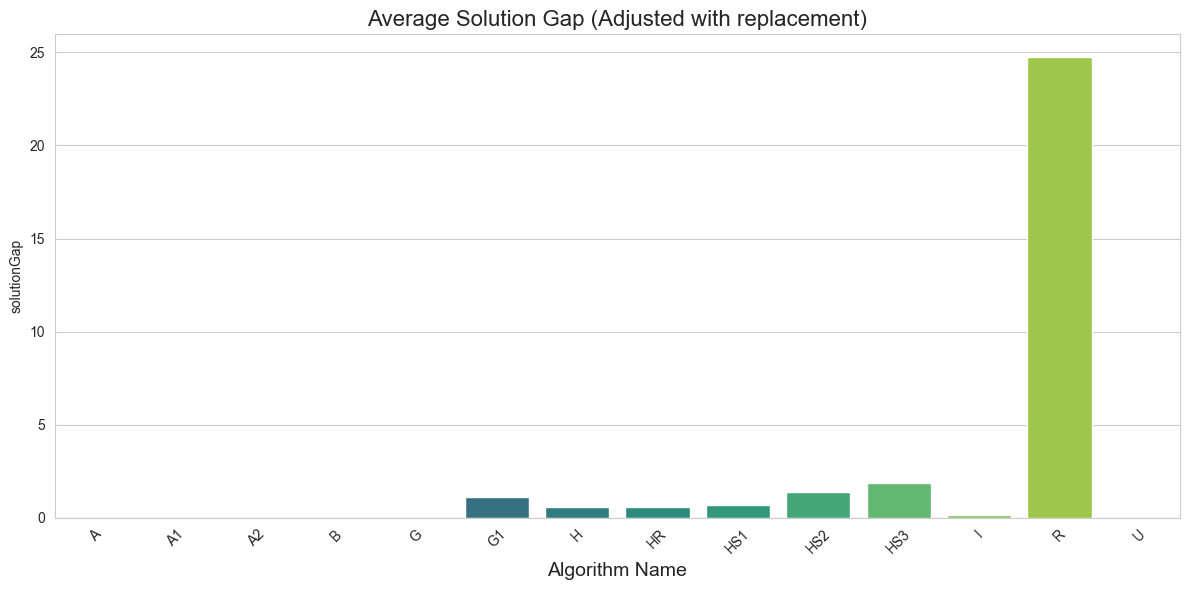

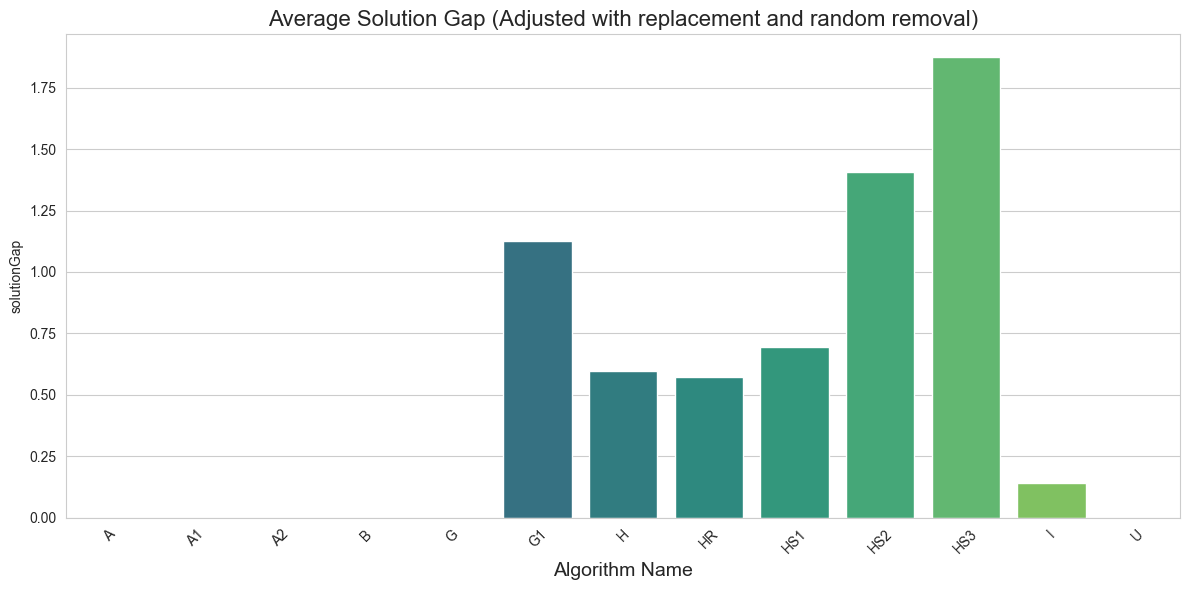

In [46]:
compare_plots(data, data_adjusted, data_no_R, plot_solution_gap)

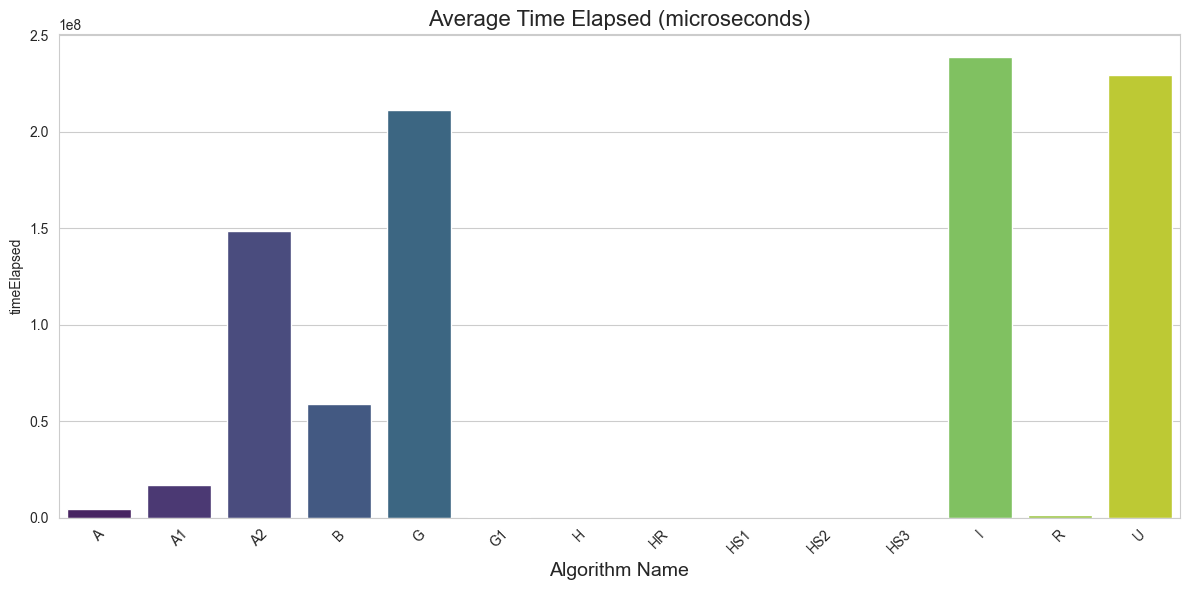

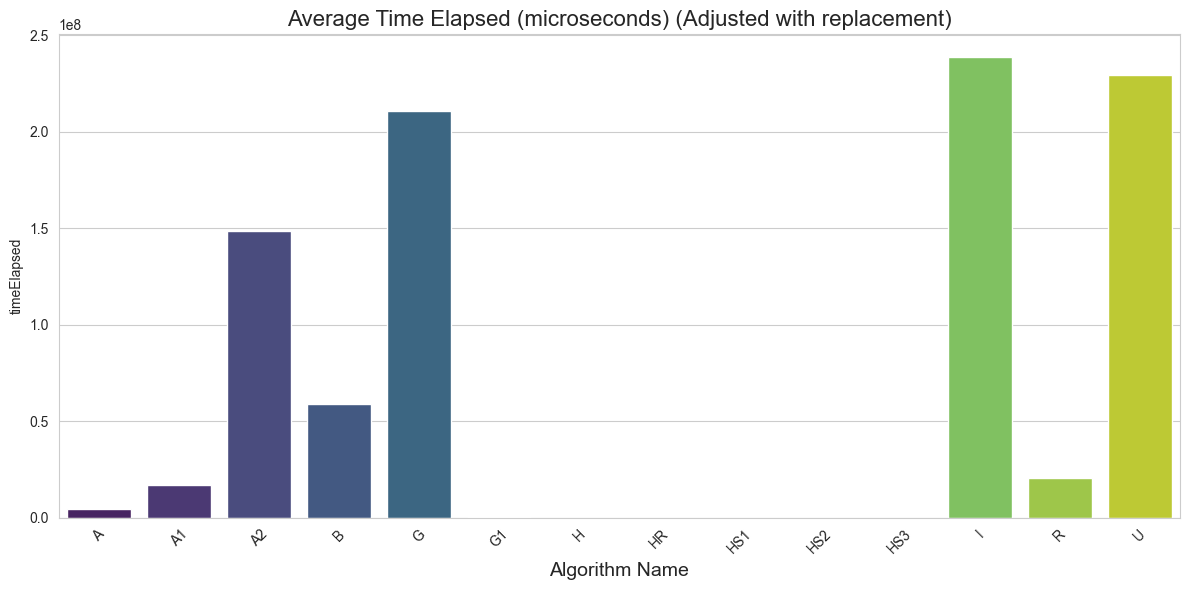

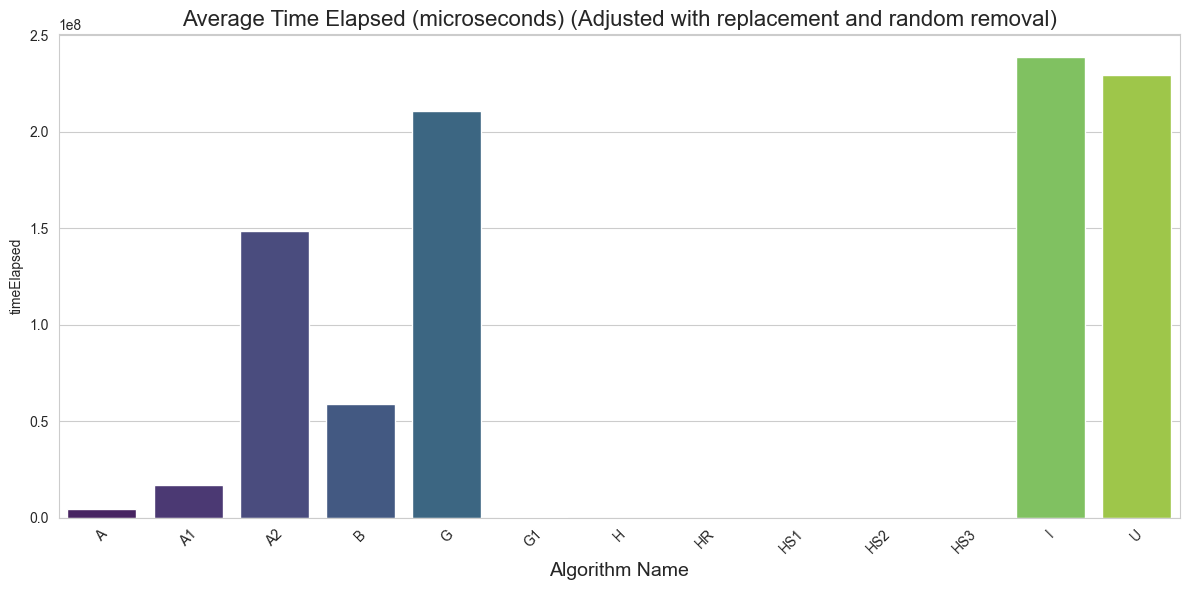

In [47]:
compare_plots(data, data_adjusted, data_no_R, plot_time_elapsed)

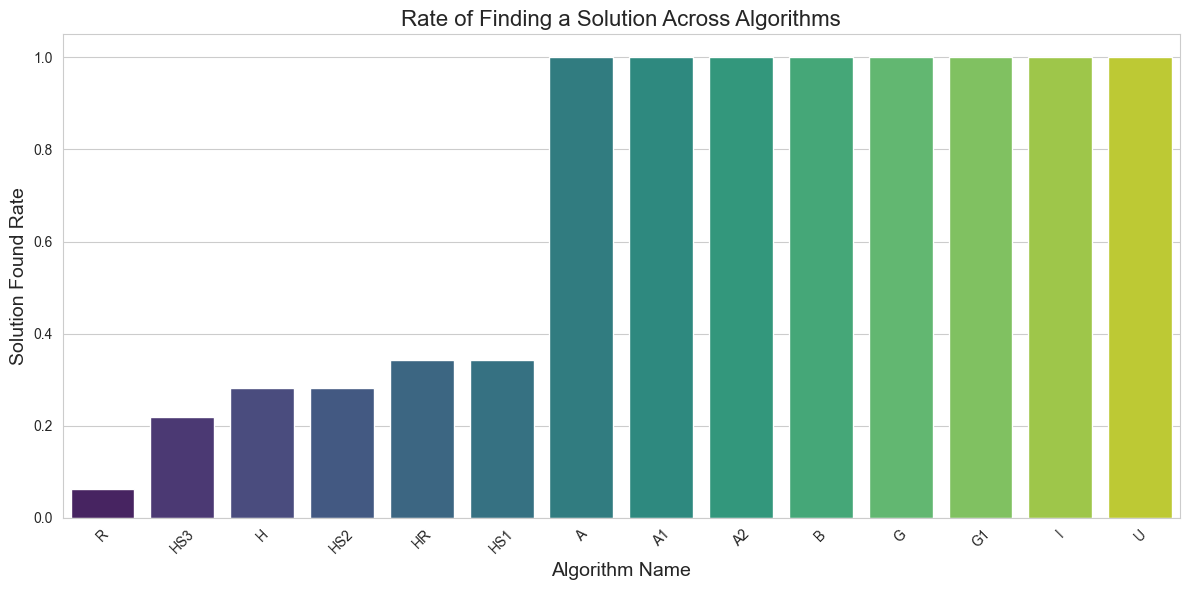

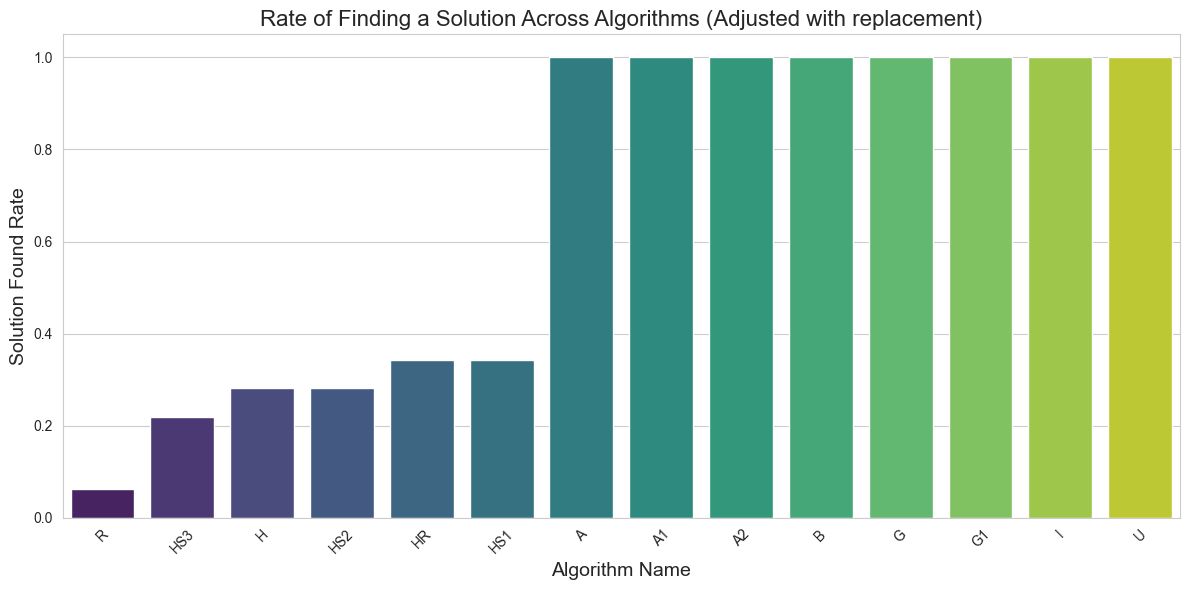

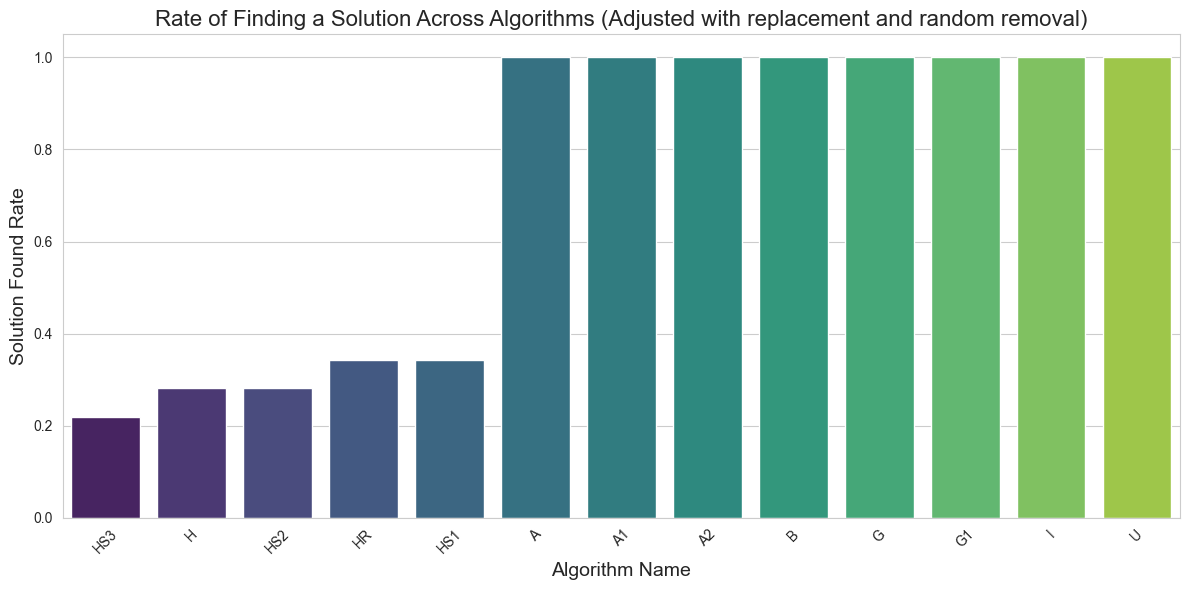

In [49]:
compare_plots(data, data_adjusted, data_no_R, plot_solution_found_rate)

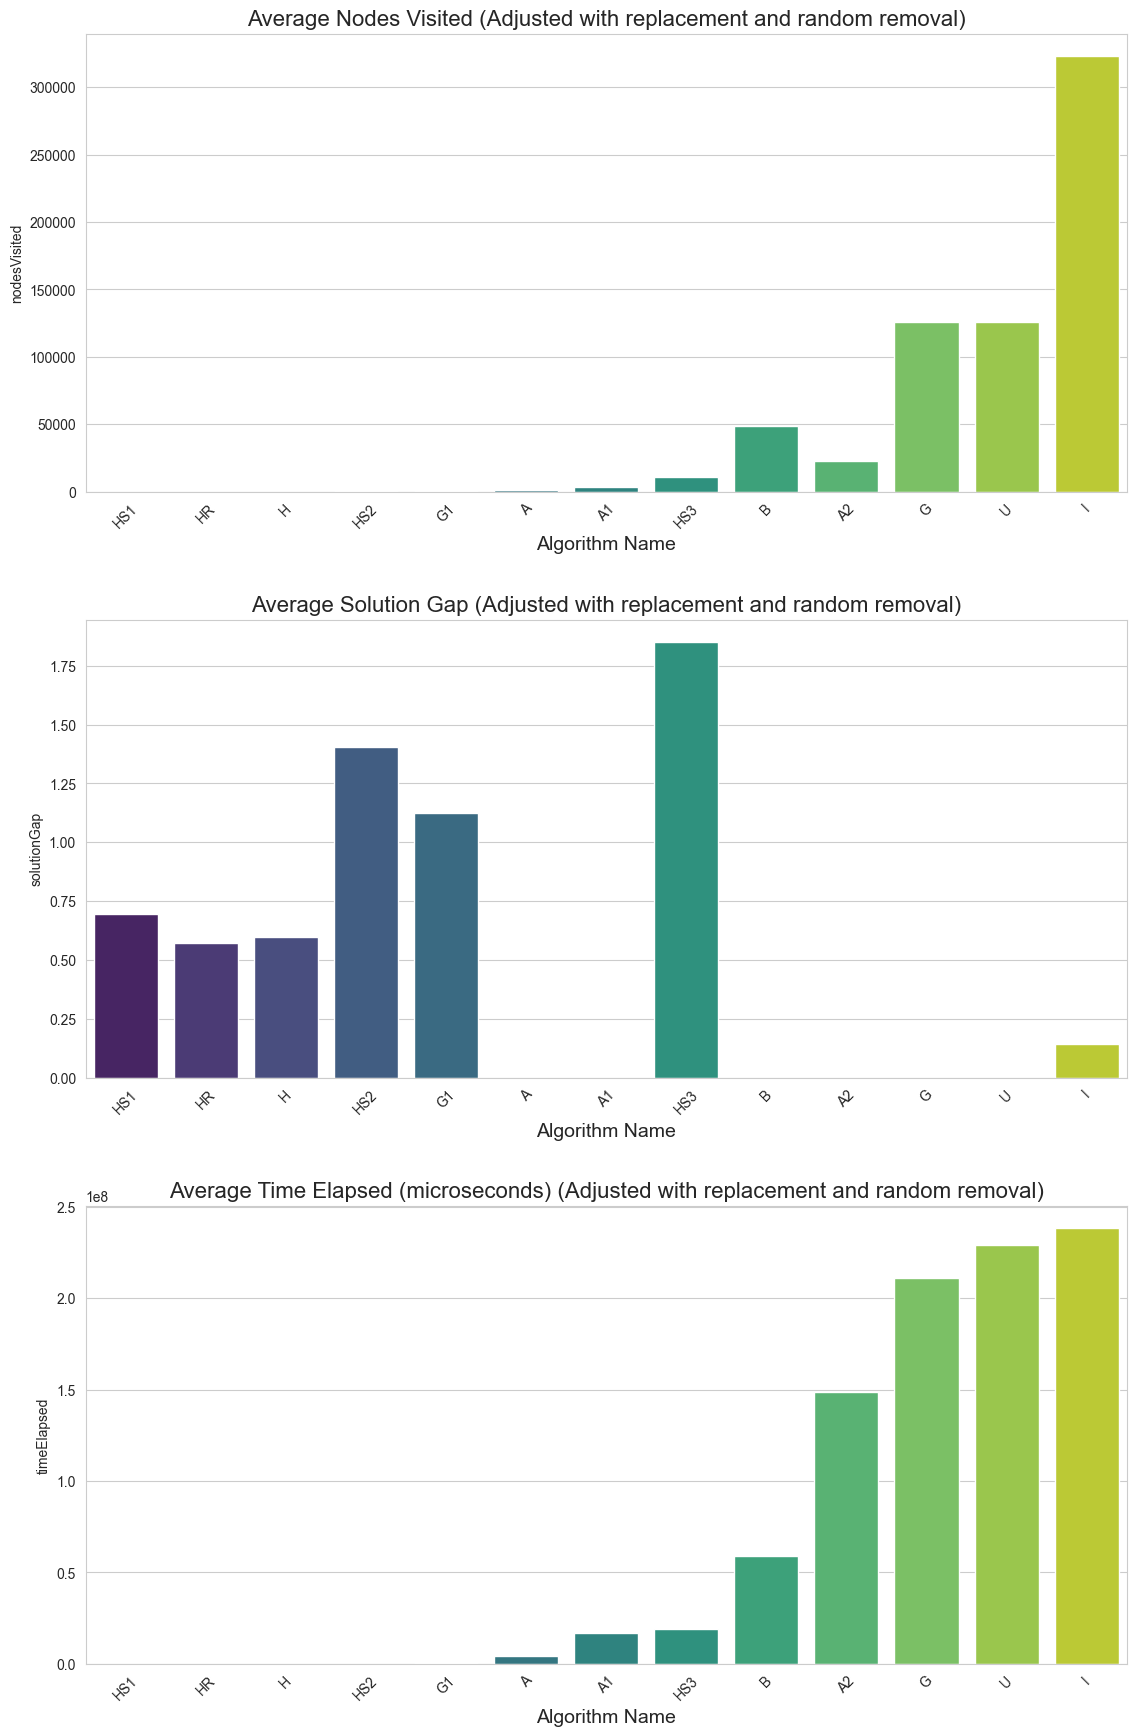

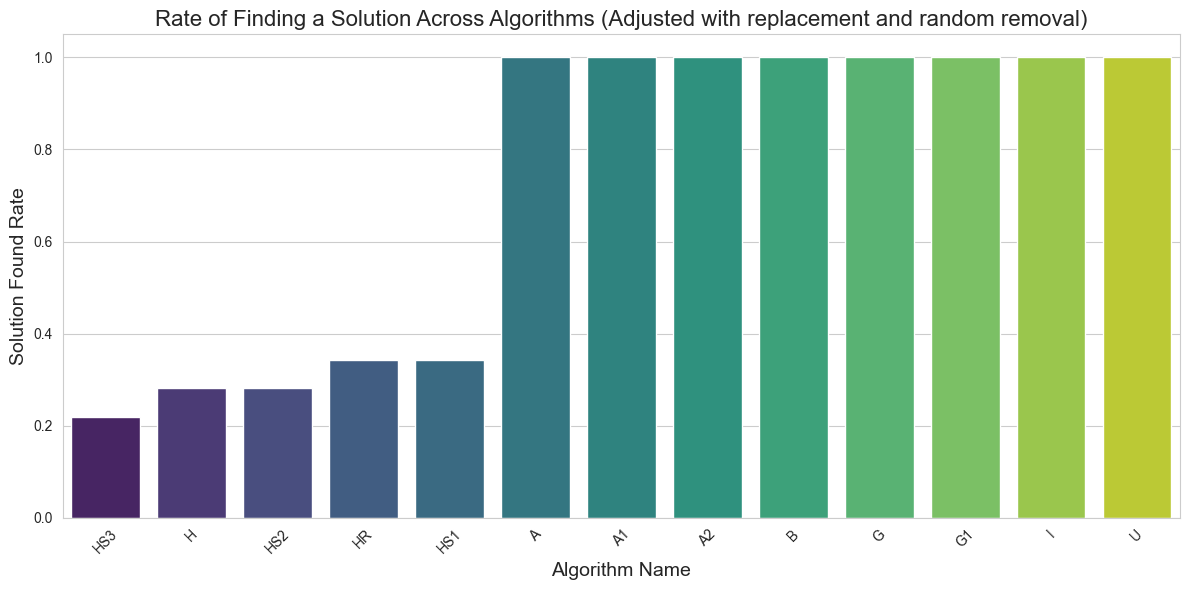

In [50]:
show_plots(data_adjusted_no_R, " (Adjusted with replacement and random removal)")

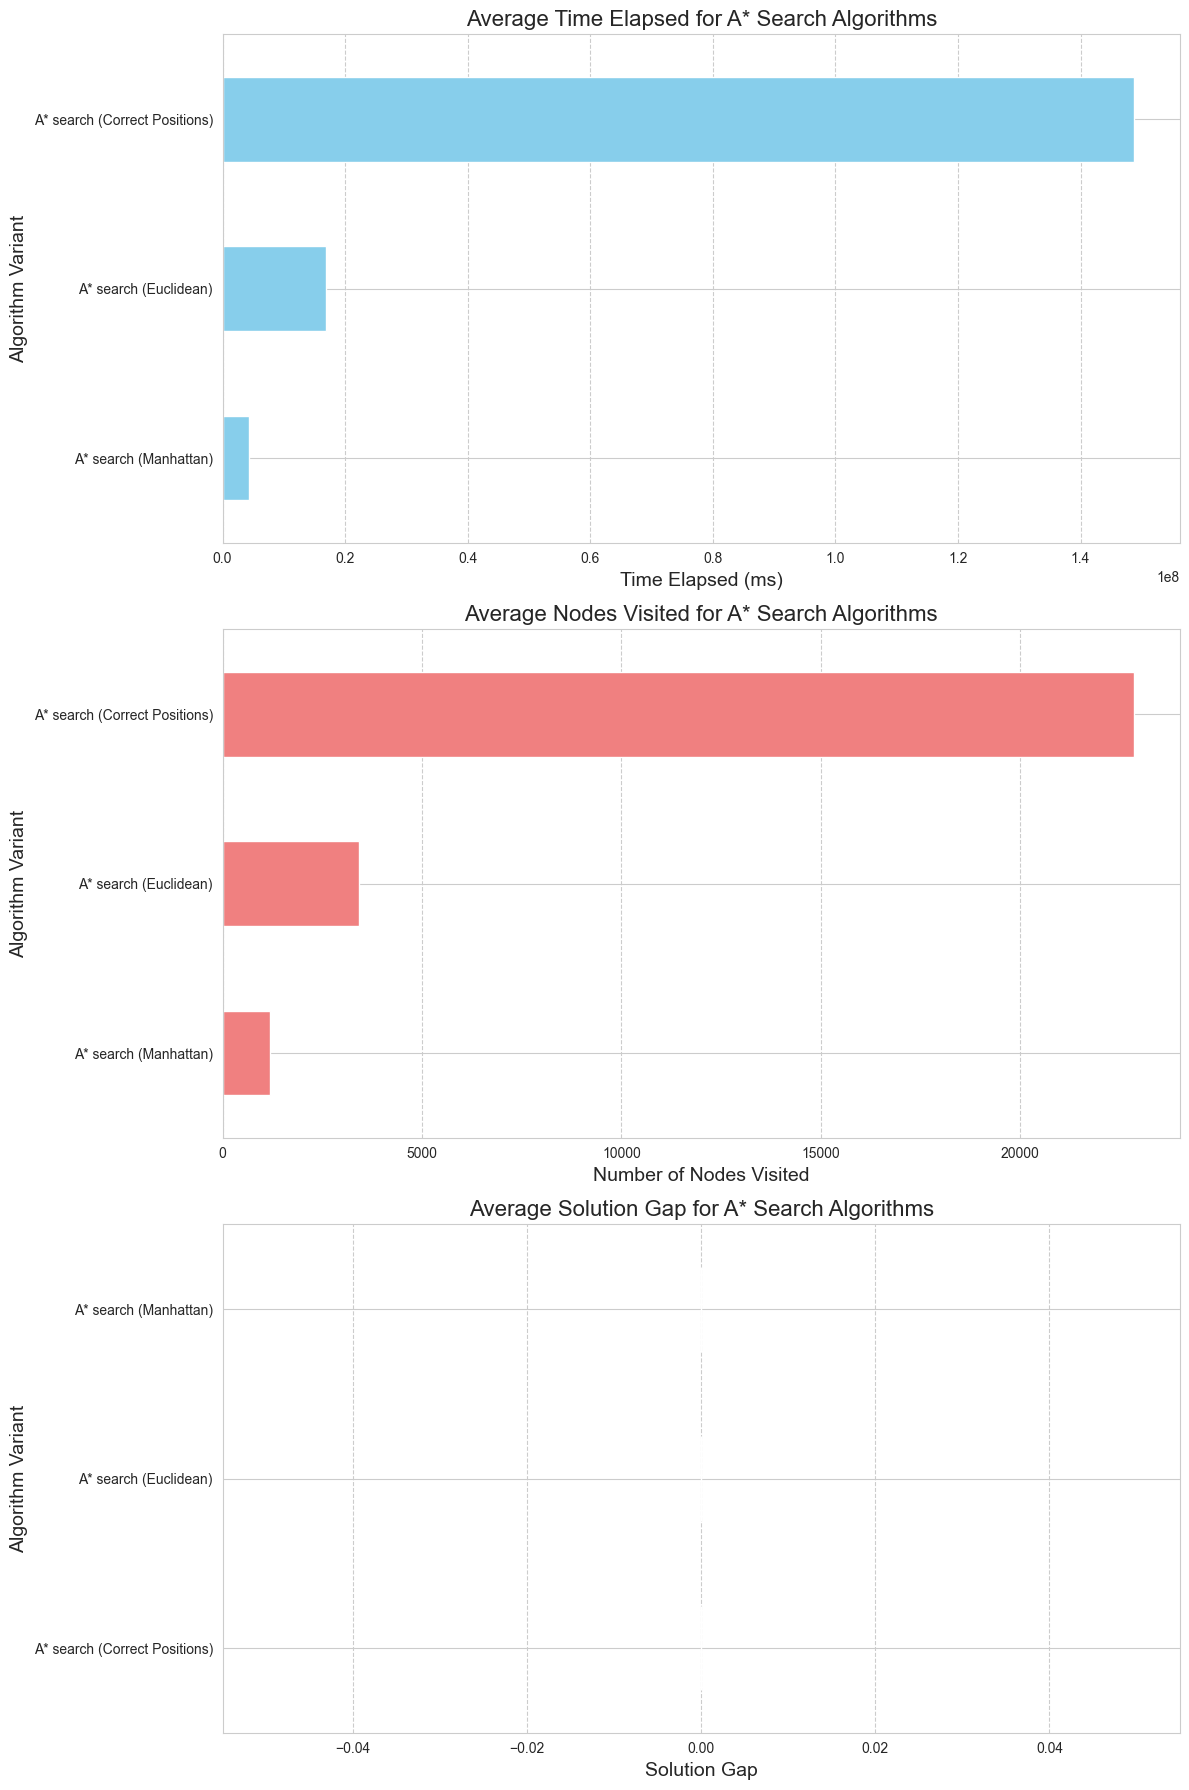

In [55]:
# Filter out the data for A* search algorithms
a_star_data = data[data['algorithmName'].isin(['A', 'A1', 'A2'])]

# Set up the figure and axes
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Plot the average time elapsed for A* search algorithms
a_star_data.groupby("algorithmCategory")["timeElapsed"].mean().sort_values().plot(kind='barh', ax=ax[0],
                                                                                  color='skyblue')
ax[0].set_title('Average Time Elapsed for A* Search Algorithms', fontsize=16)
ax[0].set_xlabel('Time Elapsed (ms)', fontsize=14)
ax[0].set_ylabel('Algorithm Variant', fontsize=14)
ax[0].grid(axis='x', linestyle='--')

# Plot the average nodes visited for A* search algorithms
a_star_data.groupby("algorithmCategory")["nodesVisited"].mean().sort_values().plot(kind='barh', ax=ax[1],
                                                                                   color='lightcoral')
ax[1].set_title('Average Nodes Visited for A* Search Algorithms', fontsize=16)
ax[1].set_xlabel('Number of Nodes Visited', fontsize=14)
ax[1].set_ylabel('Algorithm Variant', fontsize=14)
ax[1].grid(axis='x', linestyle='--')

# Plot the average solution gap for A* search algorithms
a_star_data.groupby("algorithmCategory")["solutionGap"].mean().sort_values().plot(kind='barh', ax=ax[2],
                                                                                  color='lightgreen')
ax[2].set_title('Average Solution Gap for A* Search Algorithms', fontsize=16)
ax[2].set_xlabel('Solution Gap', fontsize=14)
ax[2].set_ylabel('Algorithm Variant', fontsize=14)
ax[2].grid(axis='x', linestyle='--')

plt.tight_layout()
plt.show()


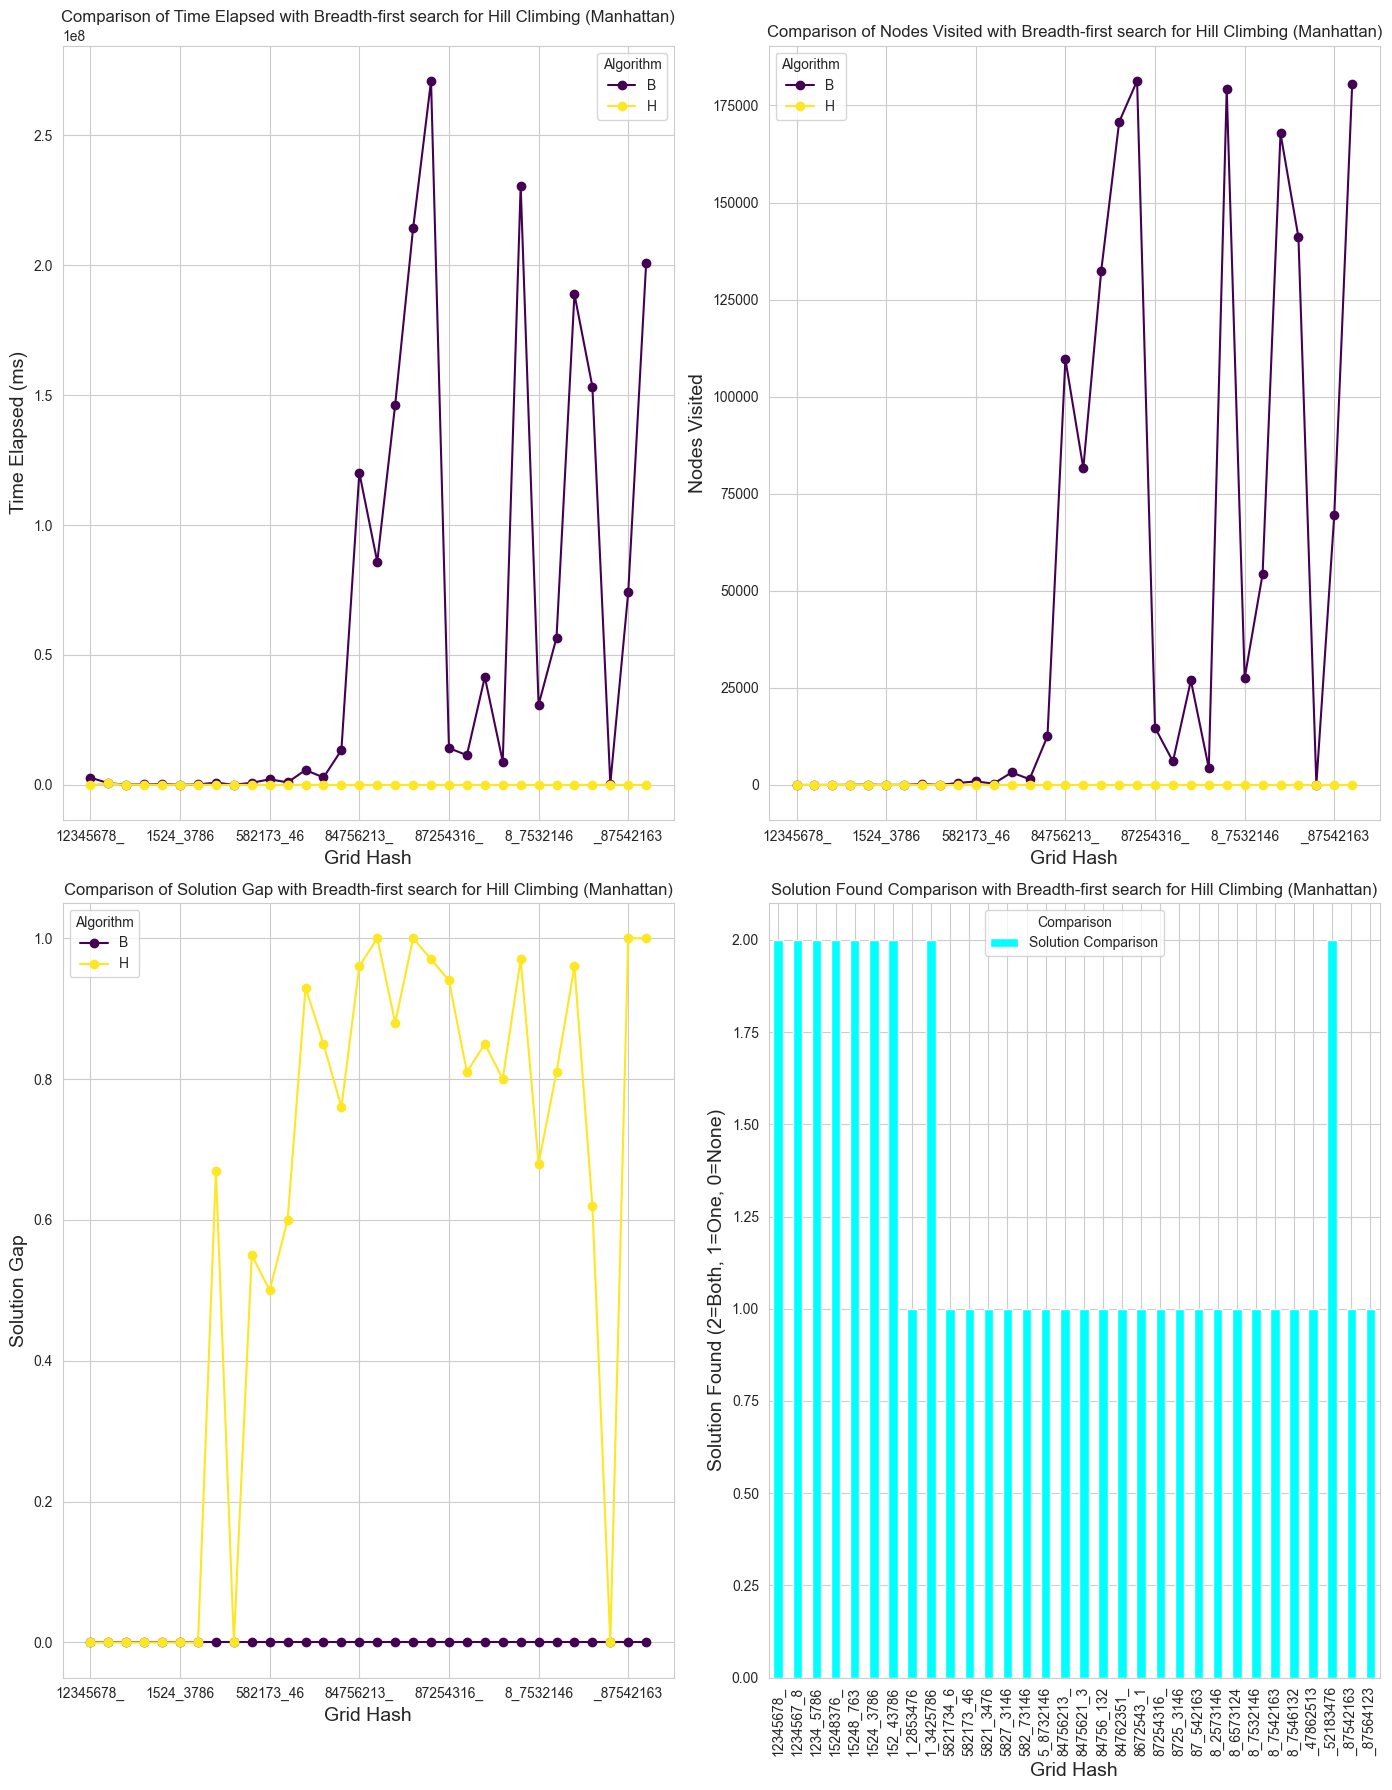

In [63]:
def compare_with_baseline(target_algorithm, data, baseline_algorithm='B'):
    # Filter data for the baseline and the target algorithm
    filtered_data = data[data['algorithmName'].isin([baseline_algorithm, target_algorithm])].copy()

    # Convert solutionFound to an integer representation for plotting
    # 2: Both found the solution, 1: Only one found, 0: None found
    filtered_data['solutionComparison'] = filtered_data.groupby('gridHash')['solutionFound'].transform('sum').astype(
        int)

    # Pivot data to have metrics as columns, gridHash as index, and algorithmName as values
    pivot_time = filtered_data.pivot(index='gridHash', columns='algorithmName', values='timeElapsed')
    pivot_nodes = filtered_data.pivot(index='gridHash', columns='algorithmName', values='nodesVisited')
    pivot_gap = filtered_data.pivot(index='gridHash', columns='algorithmName', values='solutionGap')

    # Set up the figure and axes
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 18))

    # Line graph for time elapsed
    pivot_time.plot(ax=ax[0][0], marker='o', colormap='viridis')
    ax[0][0].set_title(
        f'Comparison of Time Elapsed with {algorithm_categories[baseline_algorithm]} for {algorithm_categories[target_algorithm]}',
        fontsize=12)
    ax[0][0].set_xlabel('Grid Hash', fontsize=14)
    ax[0][0].set_ylabel('Time Elapsed (ms)', fontsize=14)
    ax[0][0].grid(True)
    ax[0][0].legend(title='Algorithm')

    # Line graph for nodes visited
    pivot_nodes.plot(ax=ax[0][1], marker='o', colormap='viridis')
    ax[0][1].set_title(
        f'Comparison of Nodes Visited with {algorithm_categories[baseline_algorithm]} for {algorithm_categories[target_algorithm]}',
        fontsize=12)
    ax[0][1].set_xlabel('Grid Hash', fontsize=14)
    ax[0][1].set_ylabel('Nodes Visited', fontsize=14)
    ax[0][1].grid(True)
    ax[0][1].legend(title='Algorithm')

    # Line graph for solution gap
    pivot_gap.plot(ax=ax[1][0], marker='o', colormap='viridis')
    ax[1][0].set_title(
        f'Comparison of Solution Gap with {algorithm_categories[baseline_algorithm]} for {algorithm_categories[target_algorithm]}',
        fontsize=12)
    ax[1][0].set_xlabel('Grid Hash', fontsize=14)
    ax[1][0].set_ylabel('Solution Gap', fontsize=14)
    ax[1][0].grid(True)
    ax[1][0].legend(title='Algorithm')

    # Bar plot for solution comparison
    filtered_data.groupby('gridHash')['solutionComparison'].mean().plot(kind='bar', ax=ax[1][1], color='cyan')
    ax[1][1].set_title(
        f'Solution Found Comparison with {algorithm_categories[baseline_algorithm]} for {algorithm_categories[target_algorithm]}',
        fontsize=12)
    ax[1][1].set_xlabel('Grid Hash', fontsize=14)
    ax[1][1].set_ylabel('Solution Found (2=Both, 1=One, 0=None)', fontsize=14)
    ax[1][1].grid(True)
    ax[1][1].legend(["Solution Comparison"], title='Comparison')

    plt.tight_layout()
    plt.show()


# Test the modified function with one algorithm
compare_with_baseline('H', data)


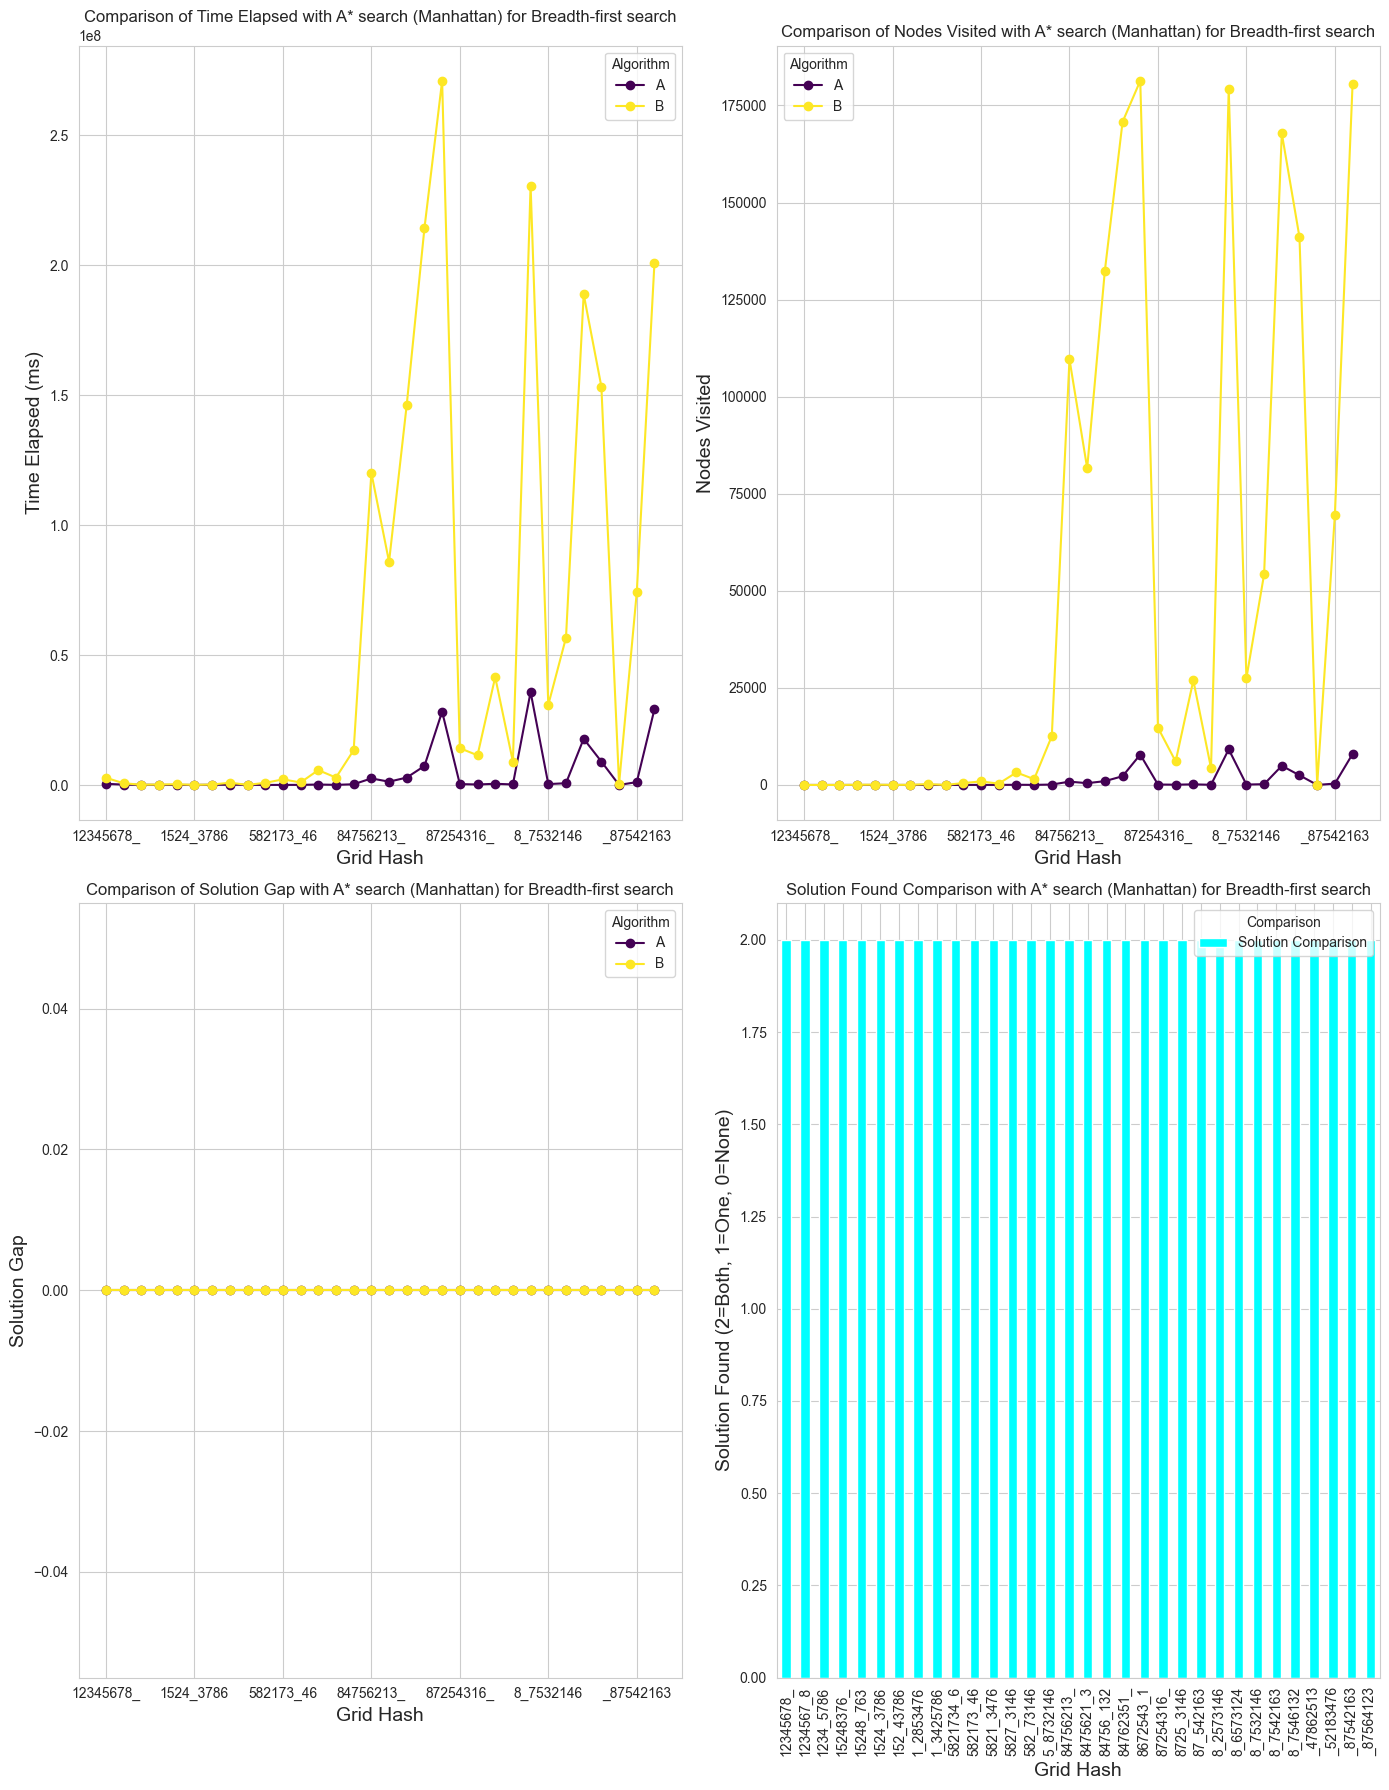

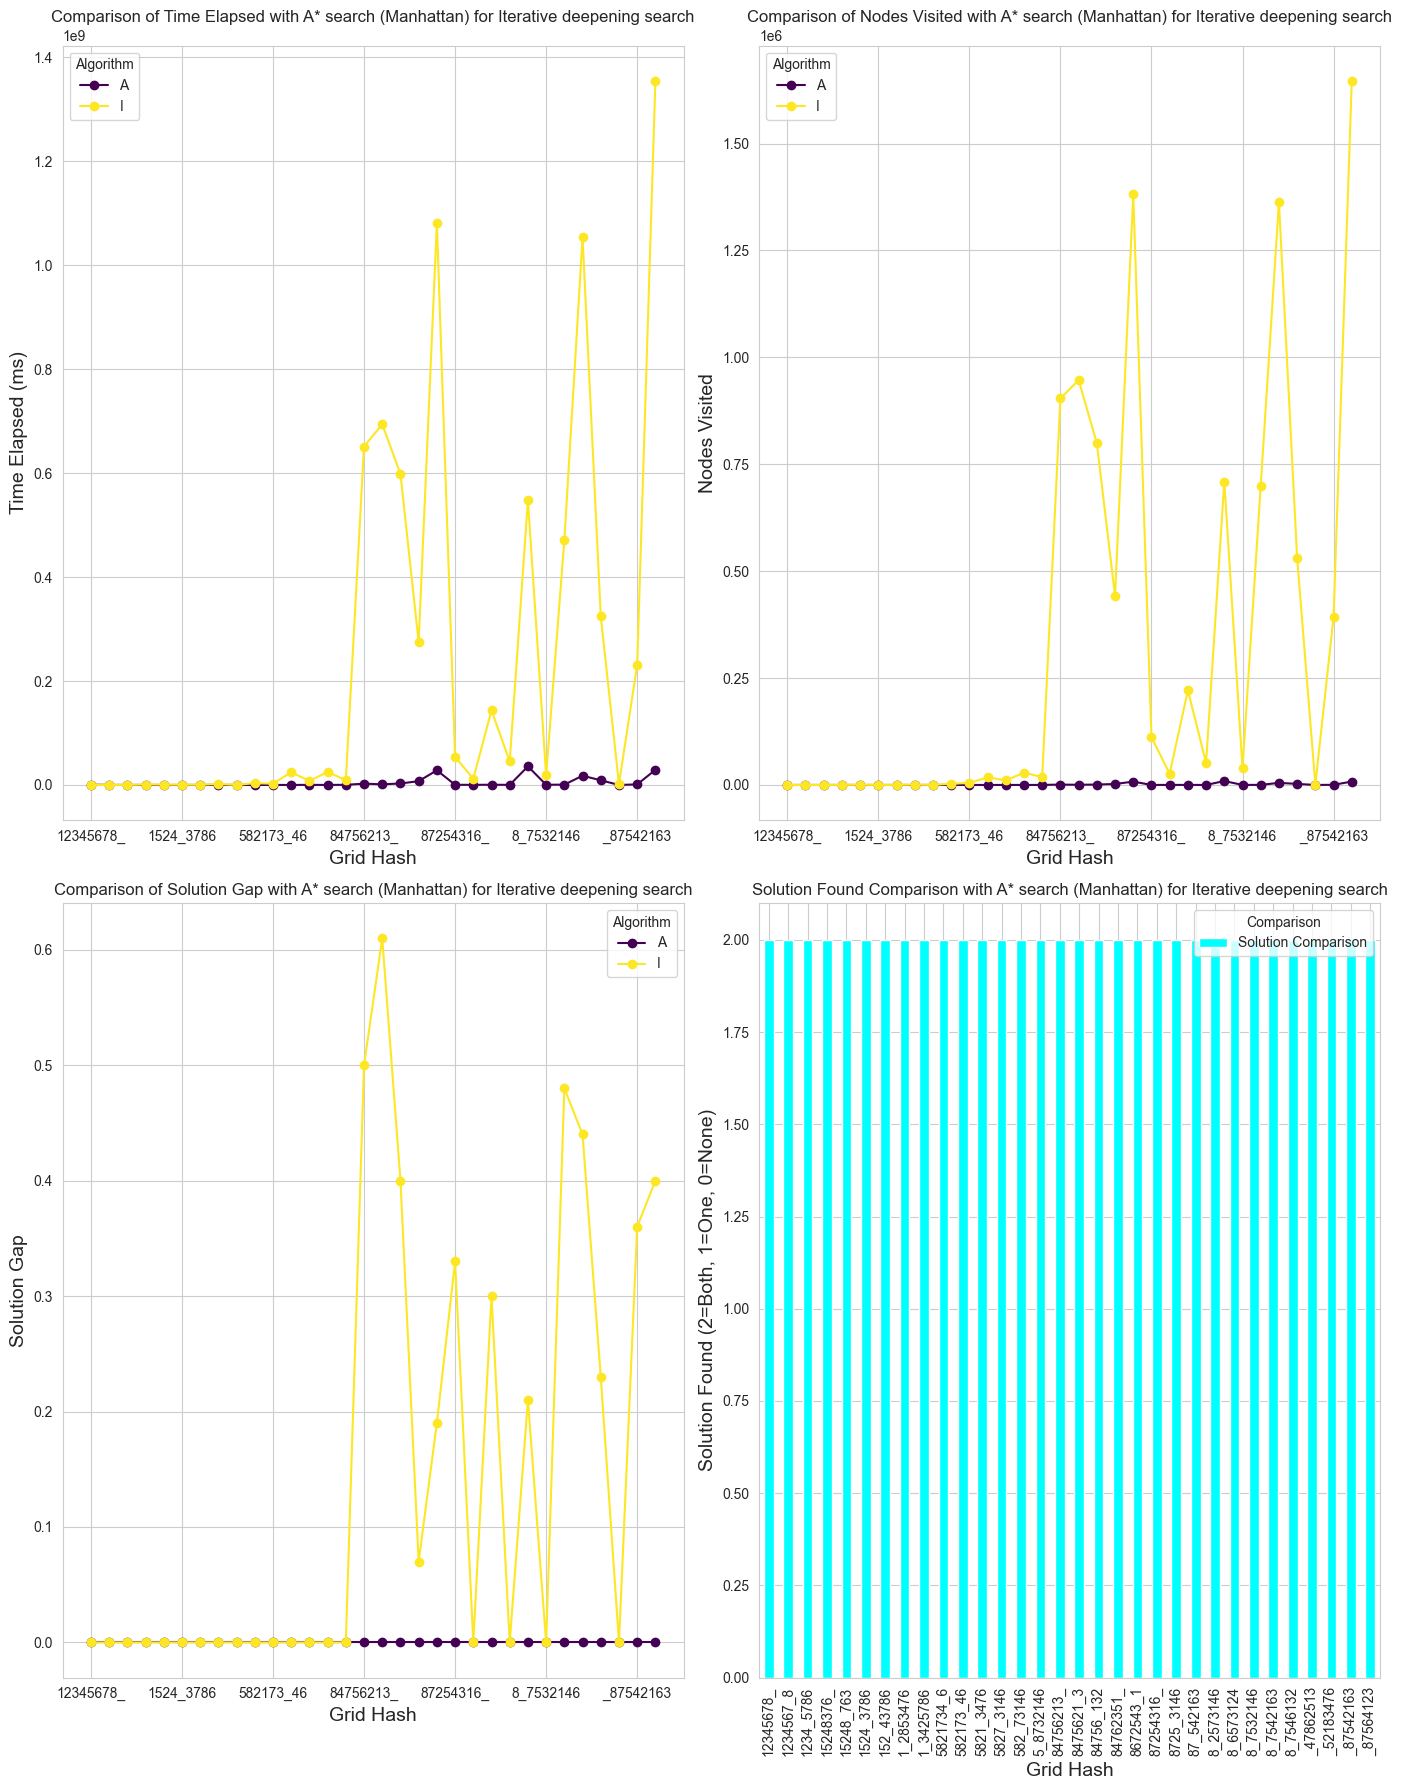

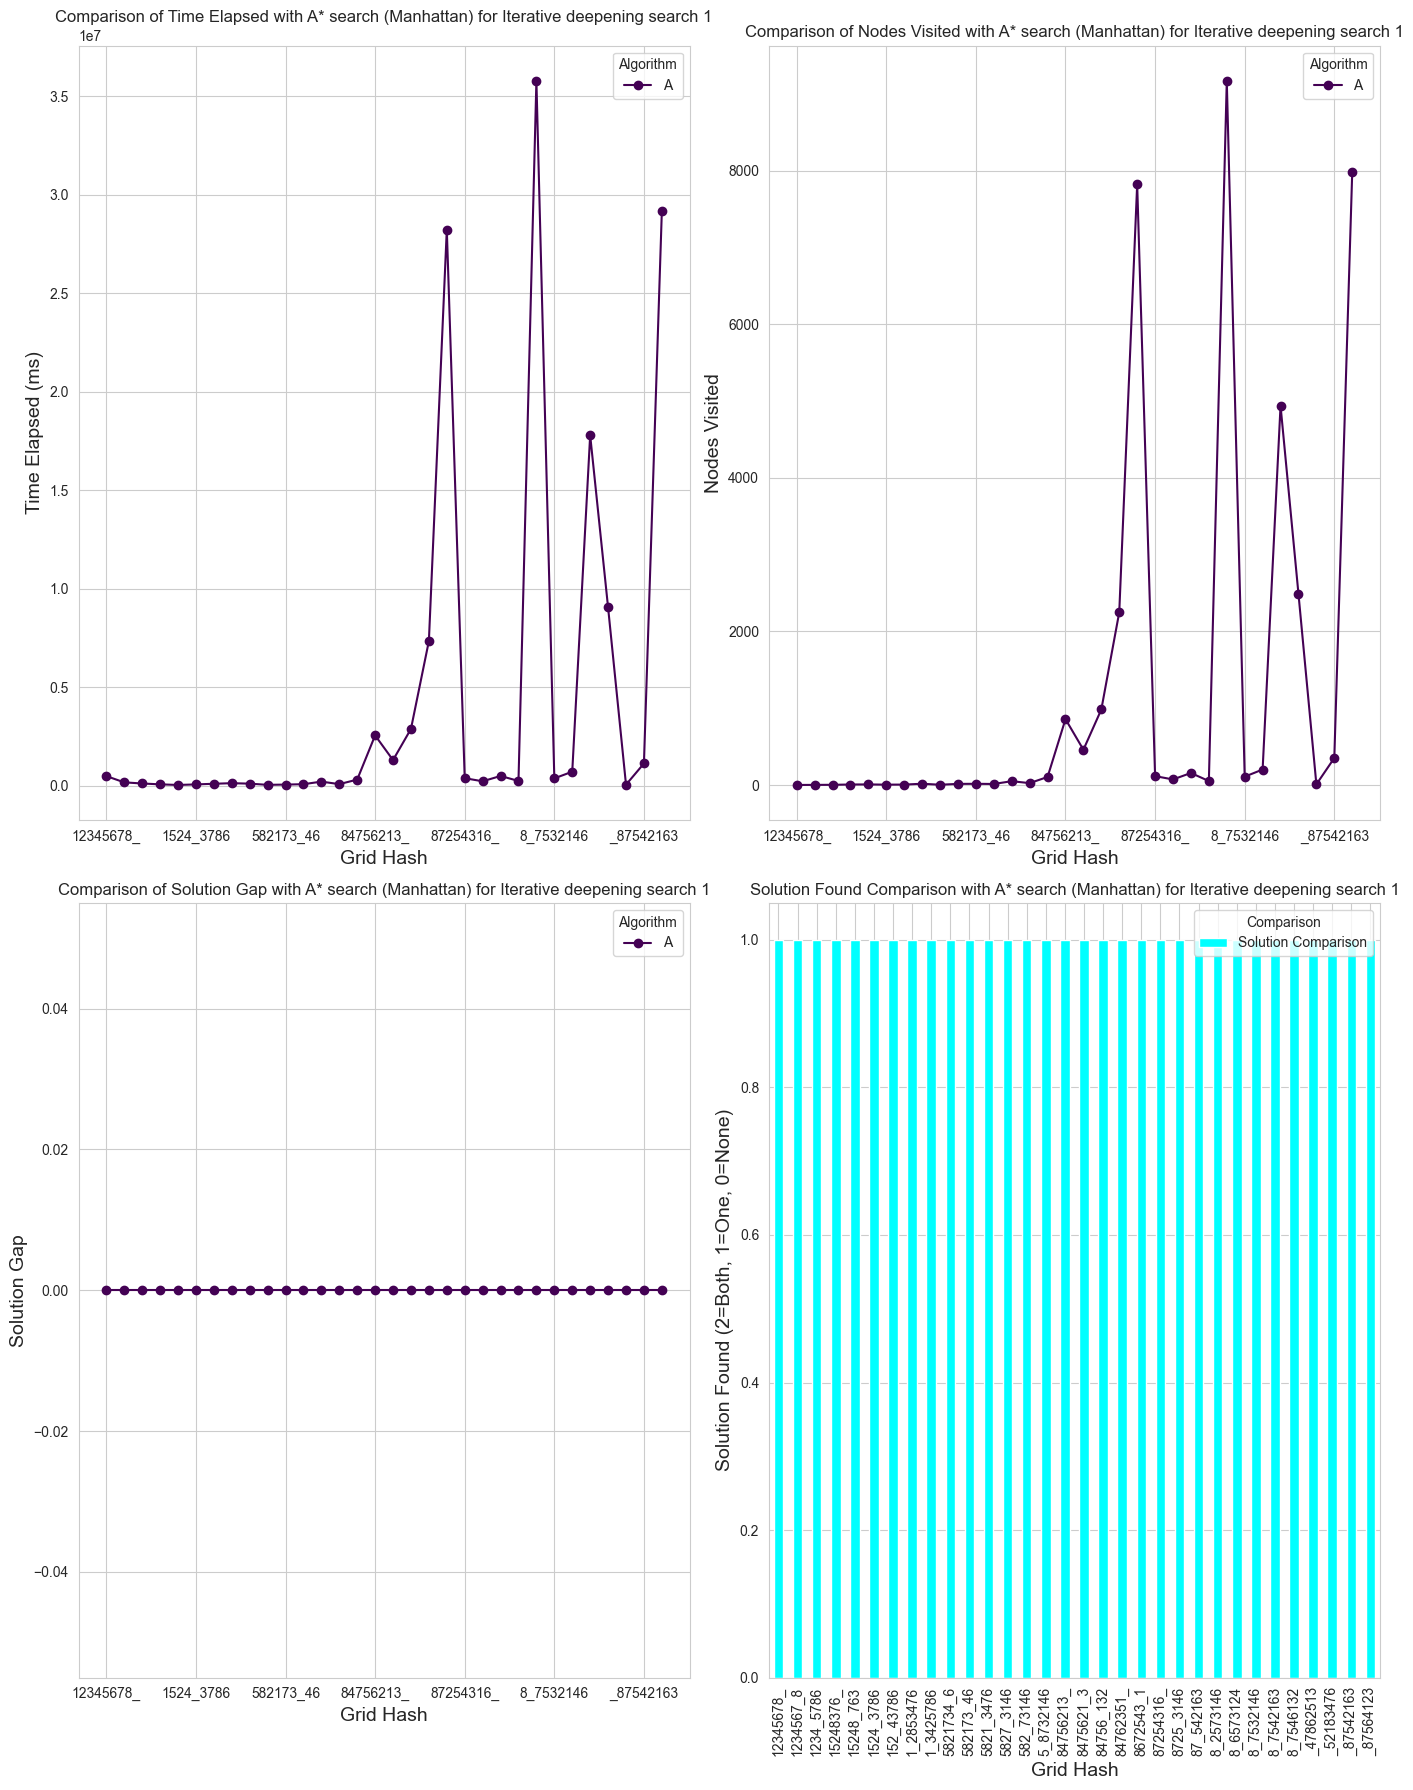

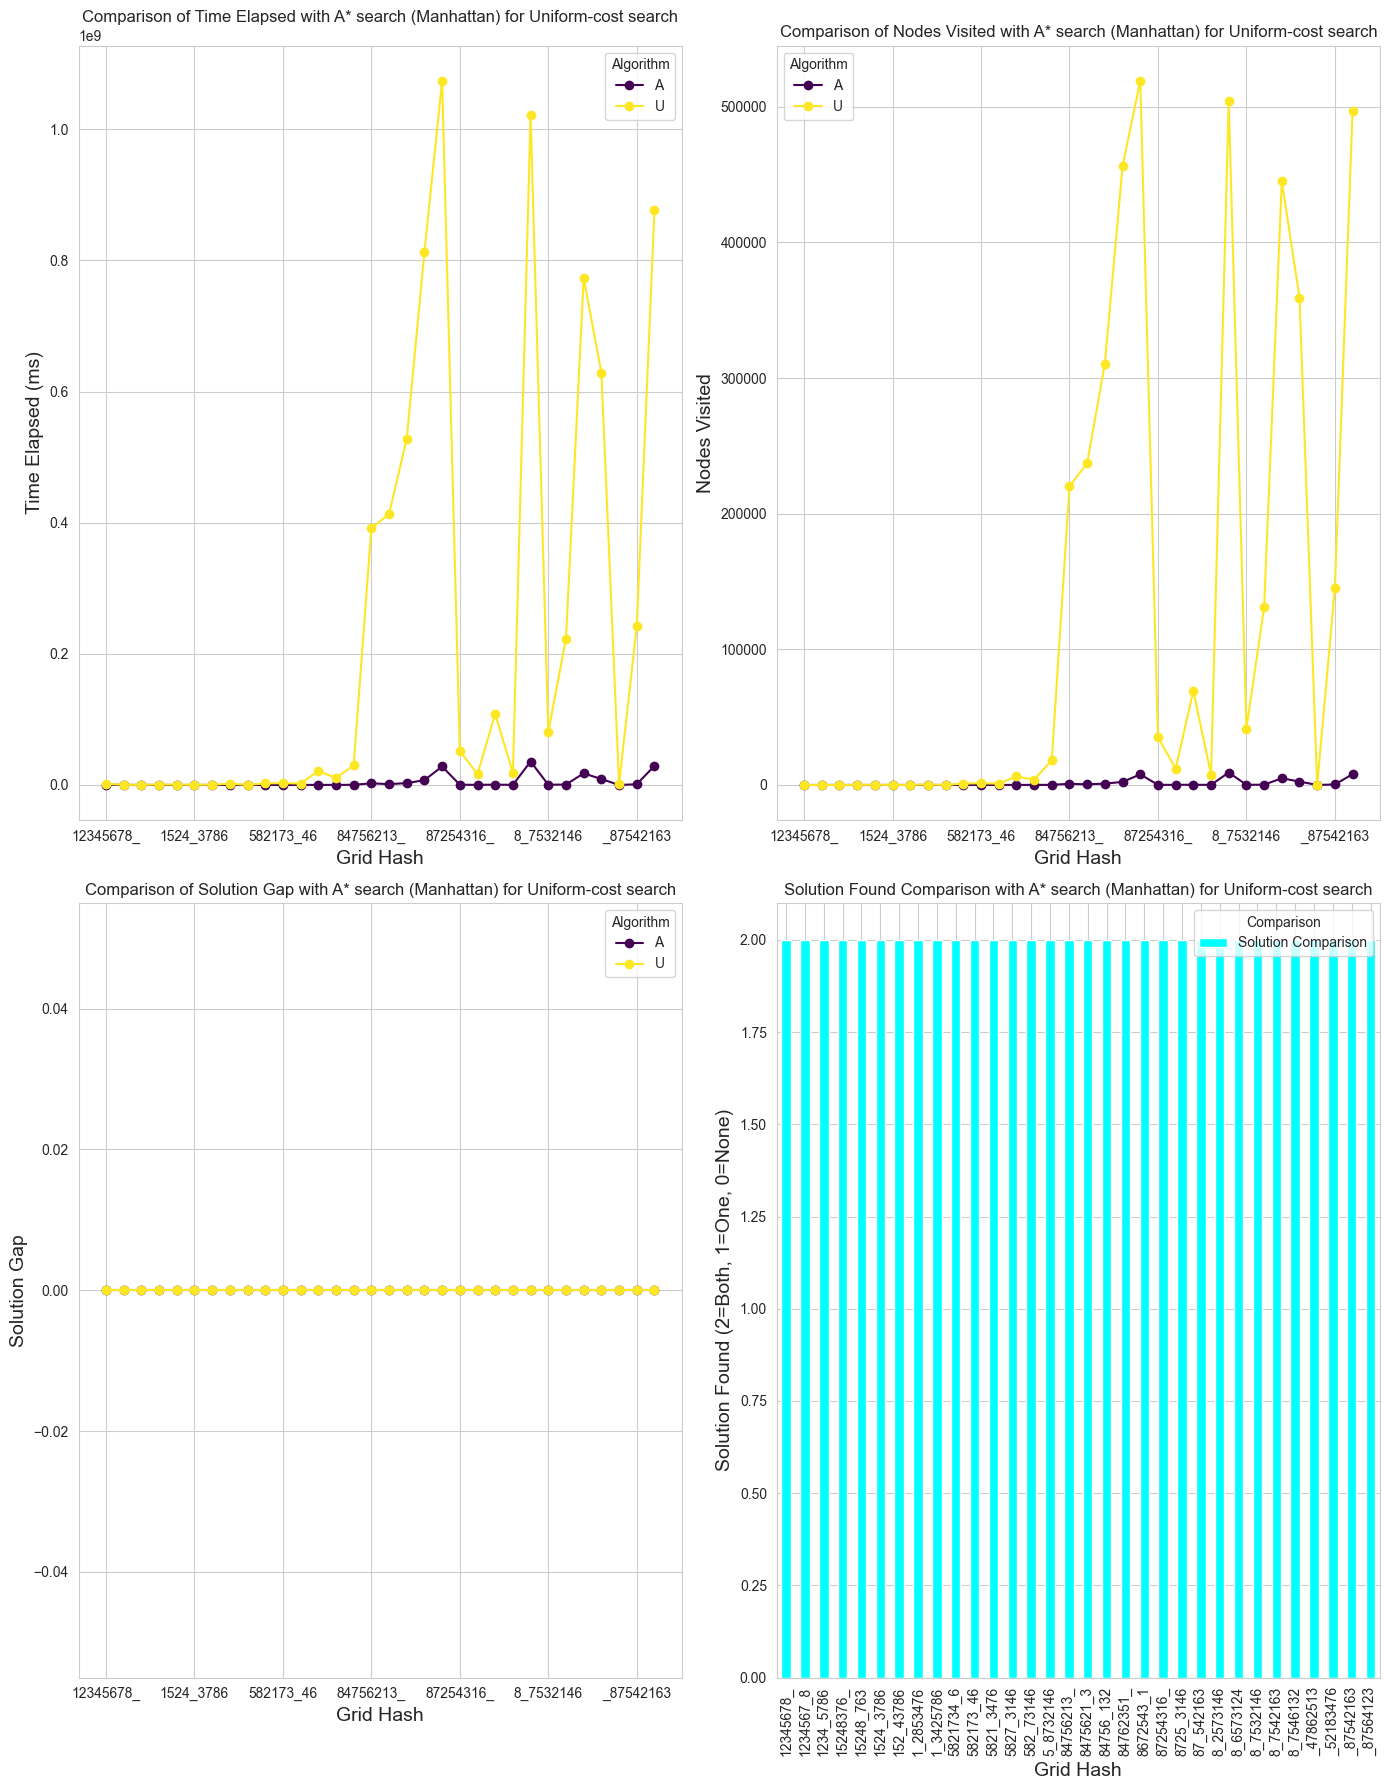

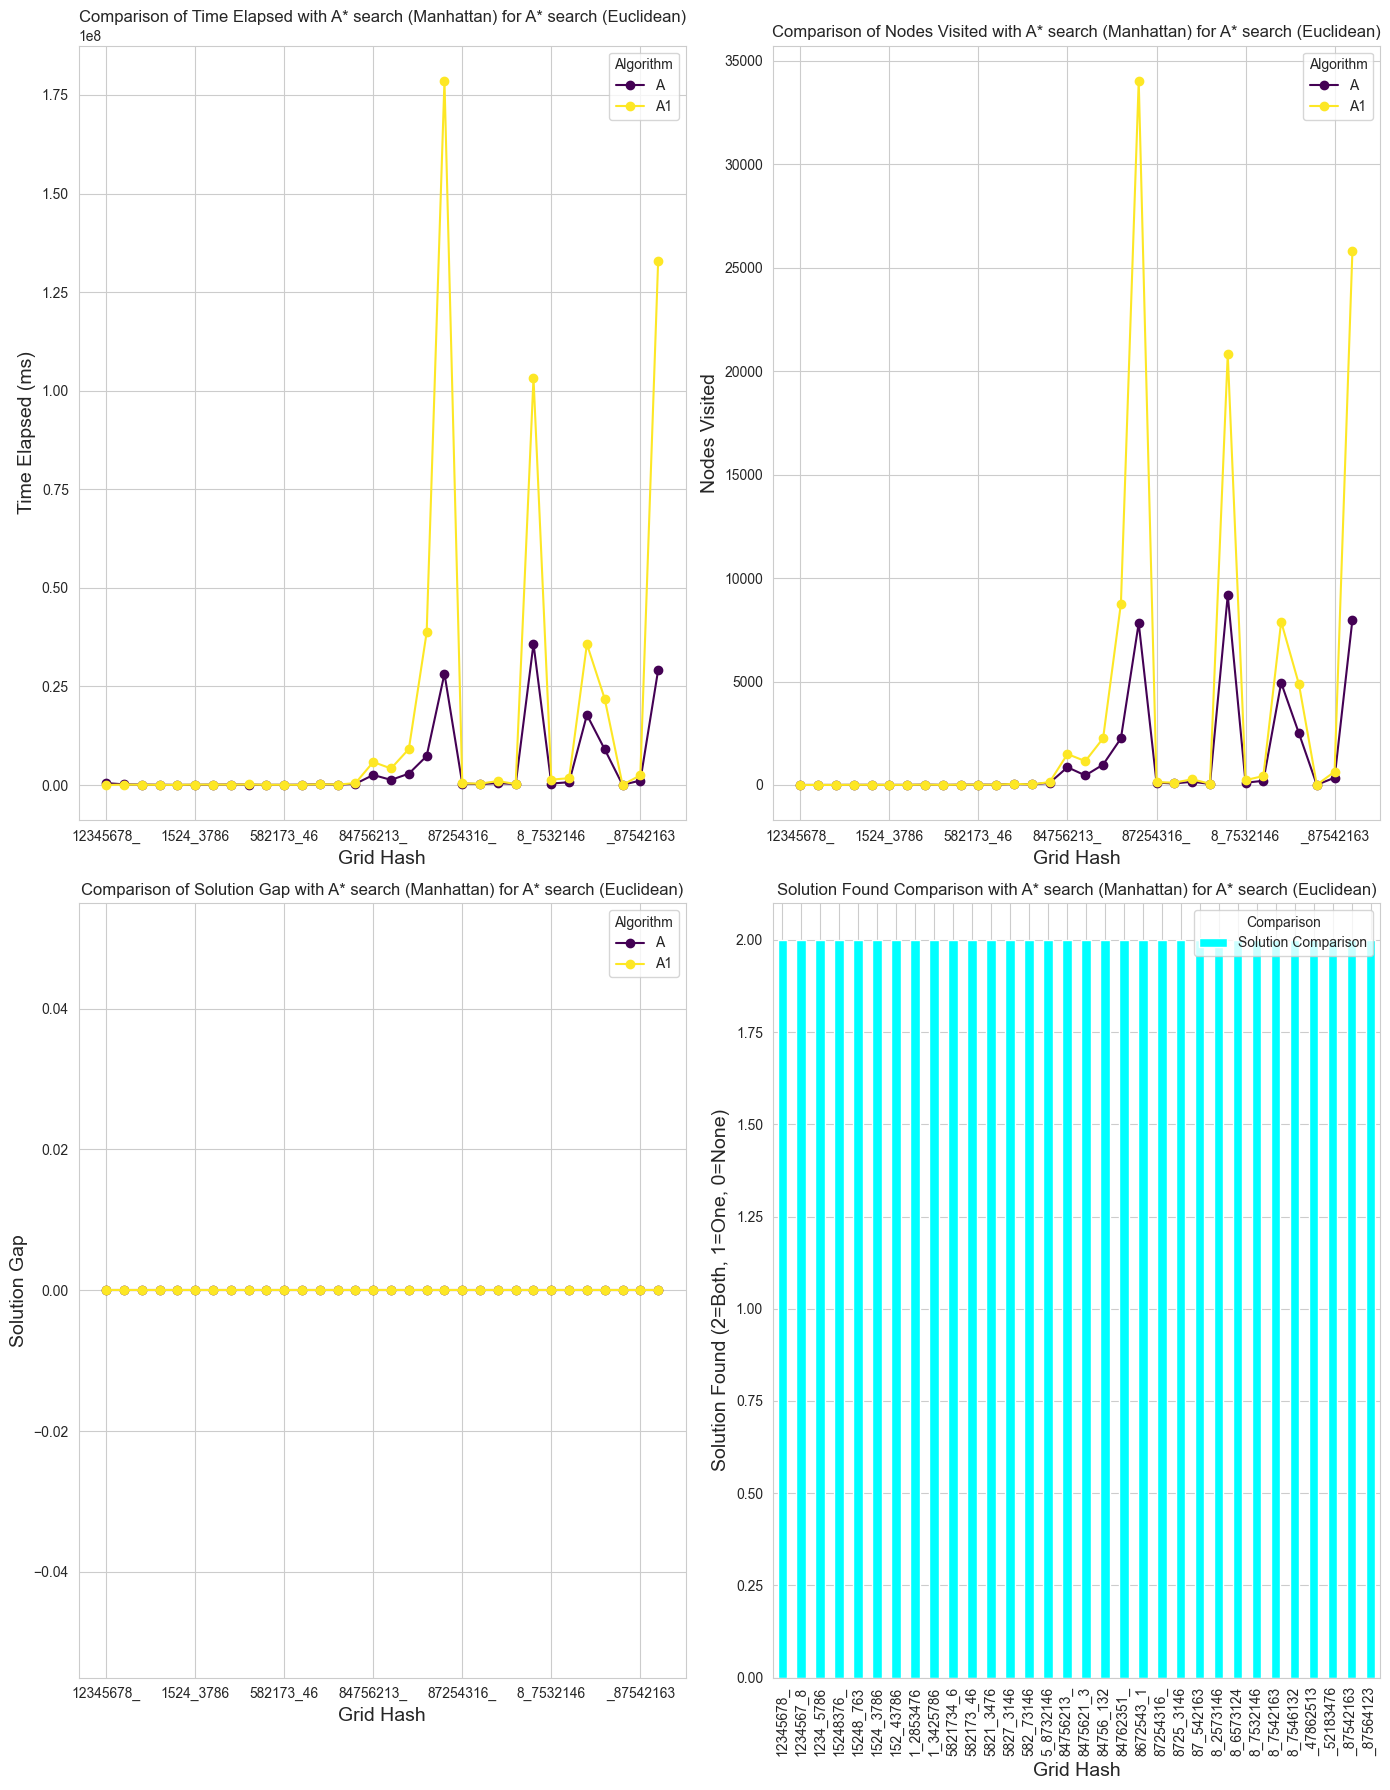

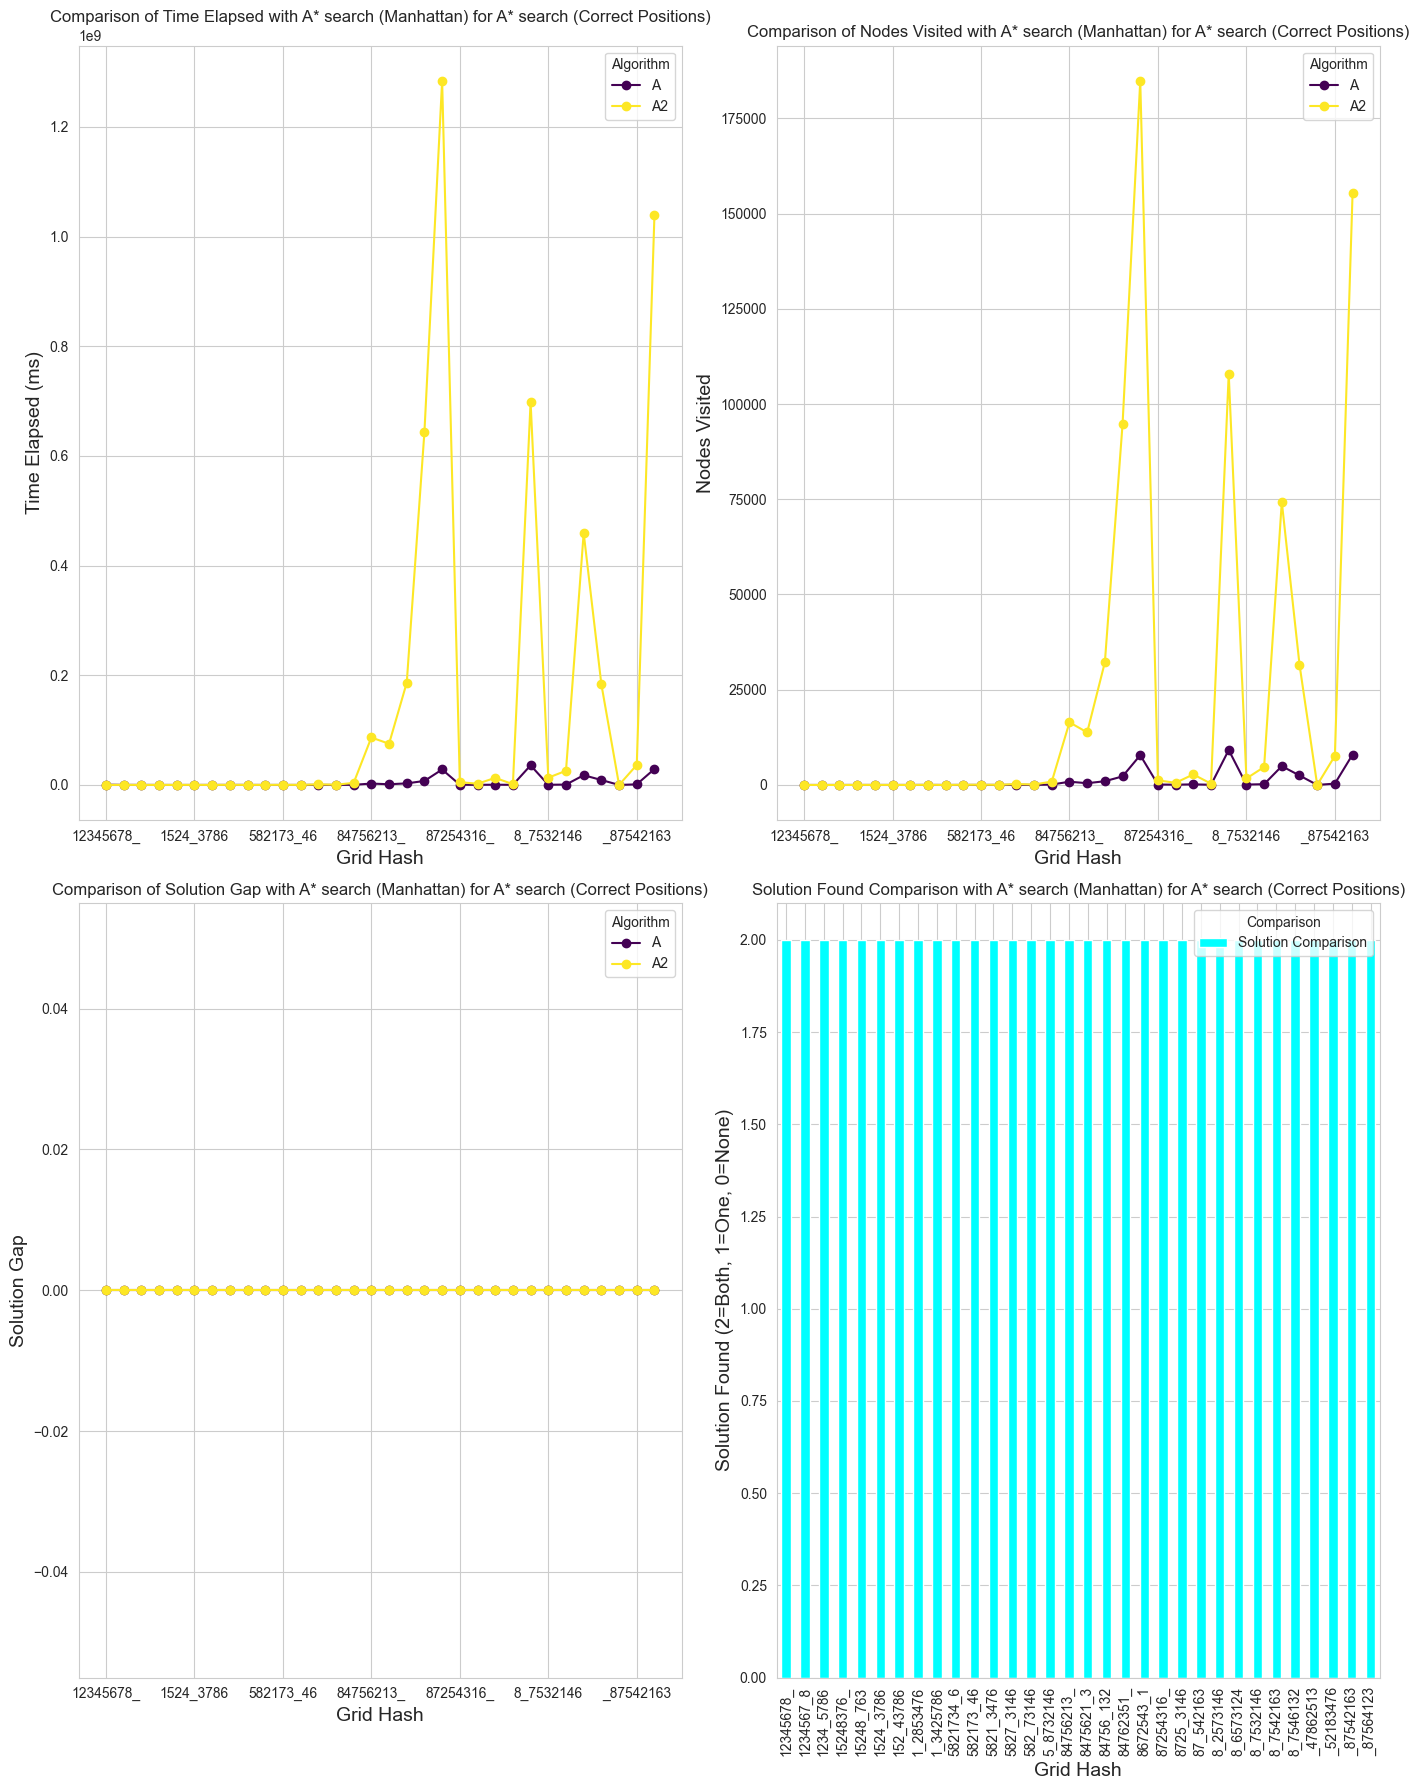

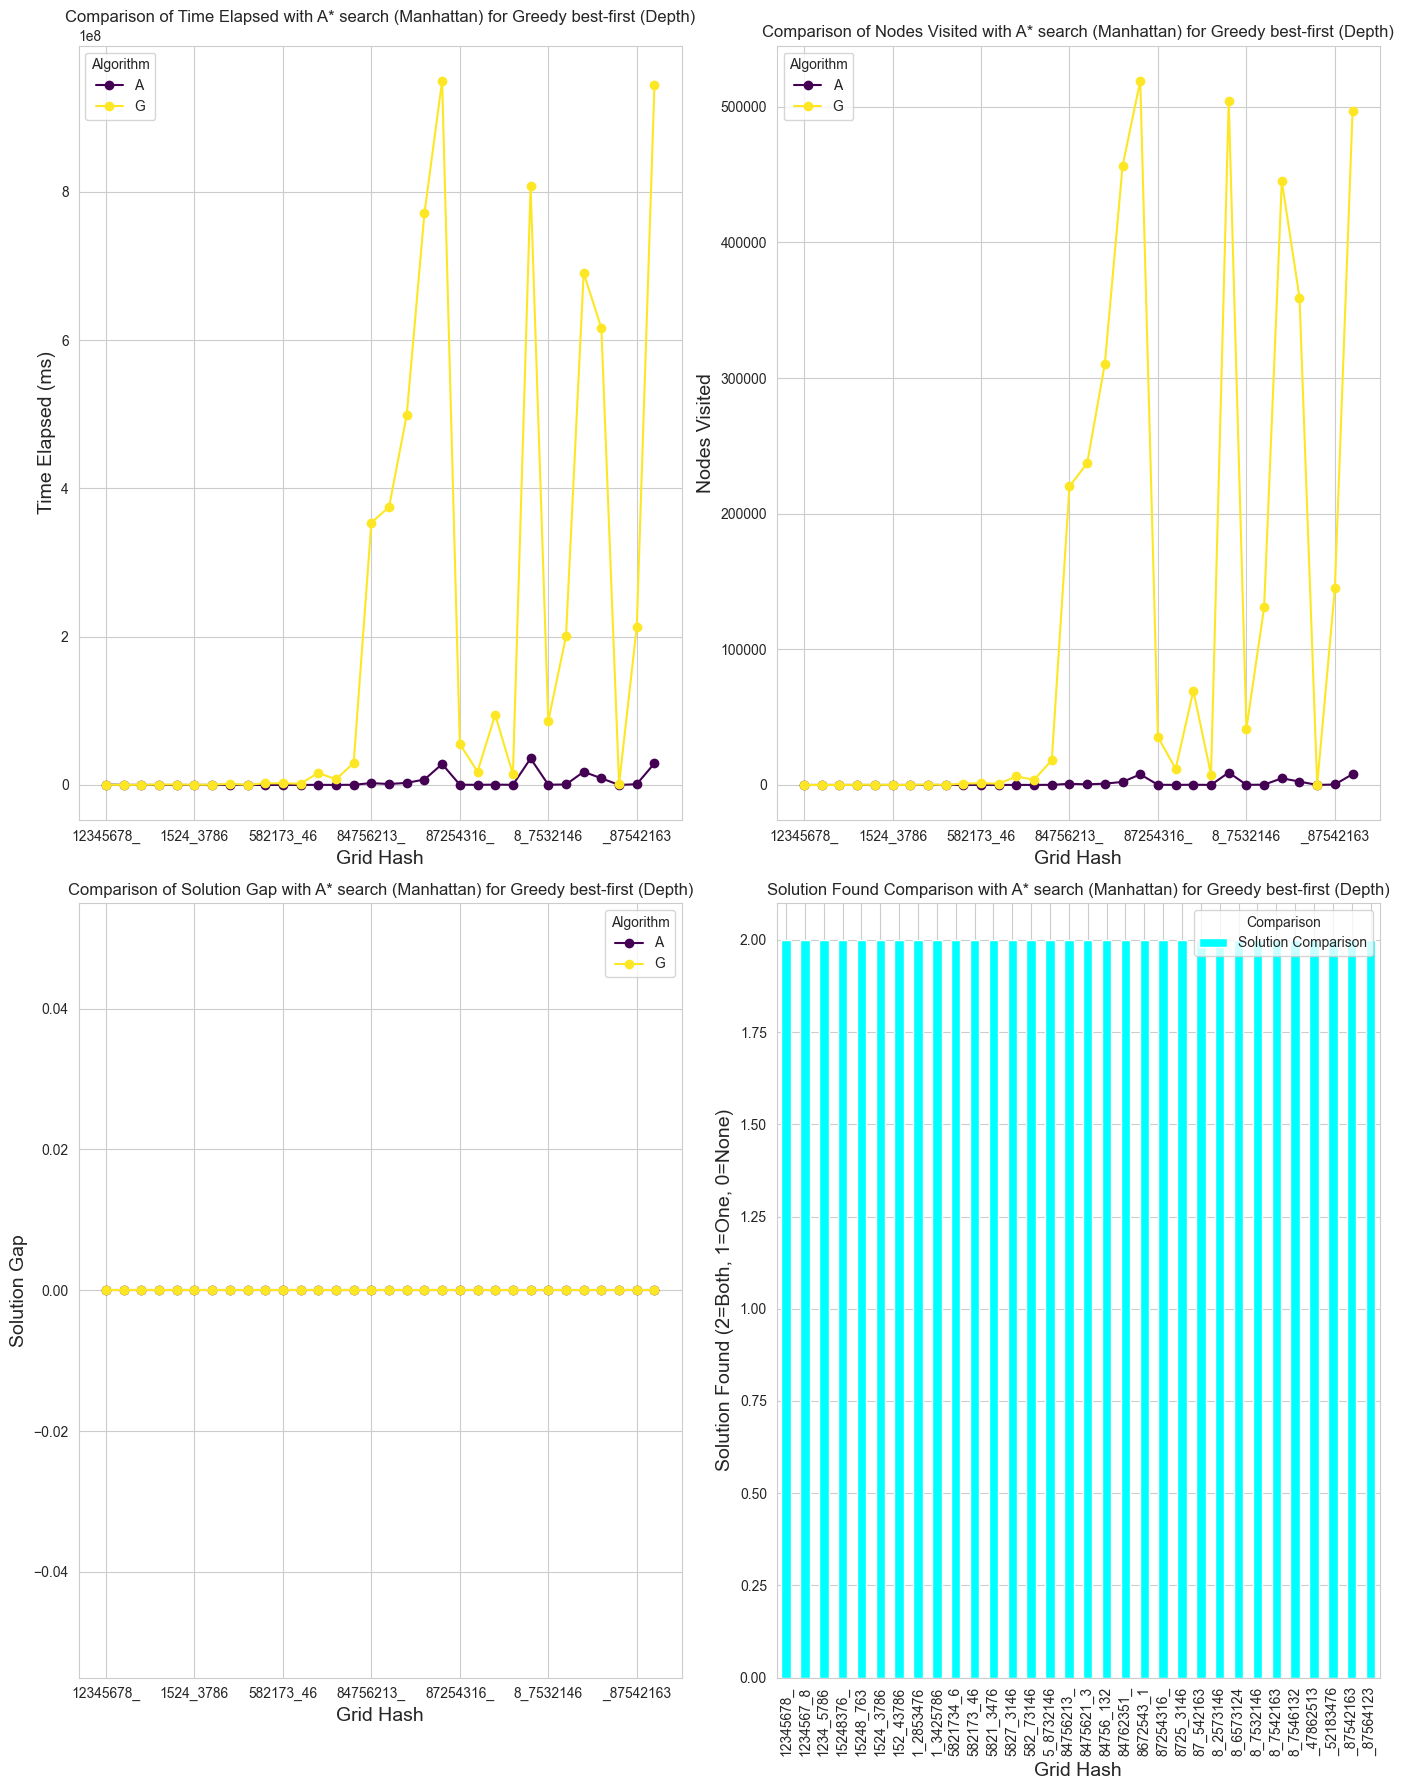

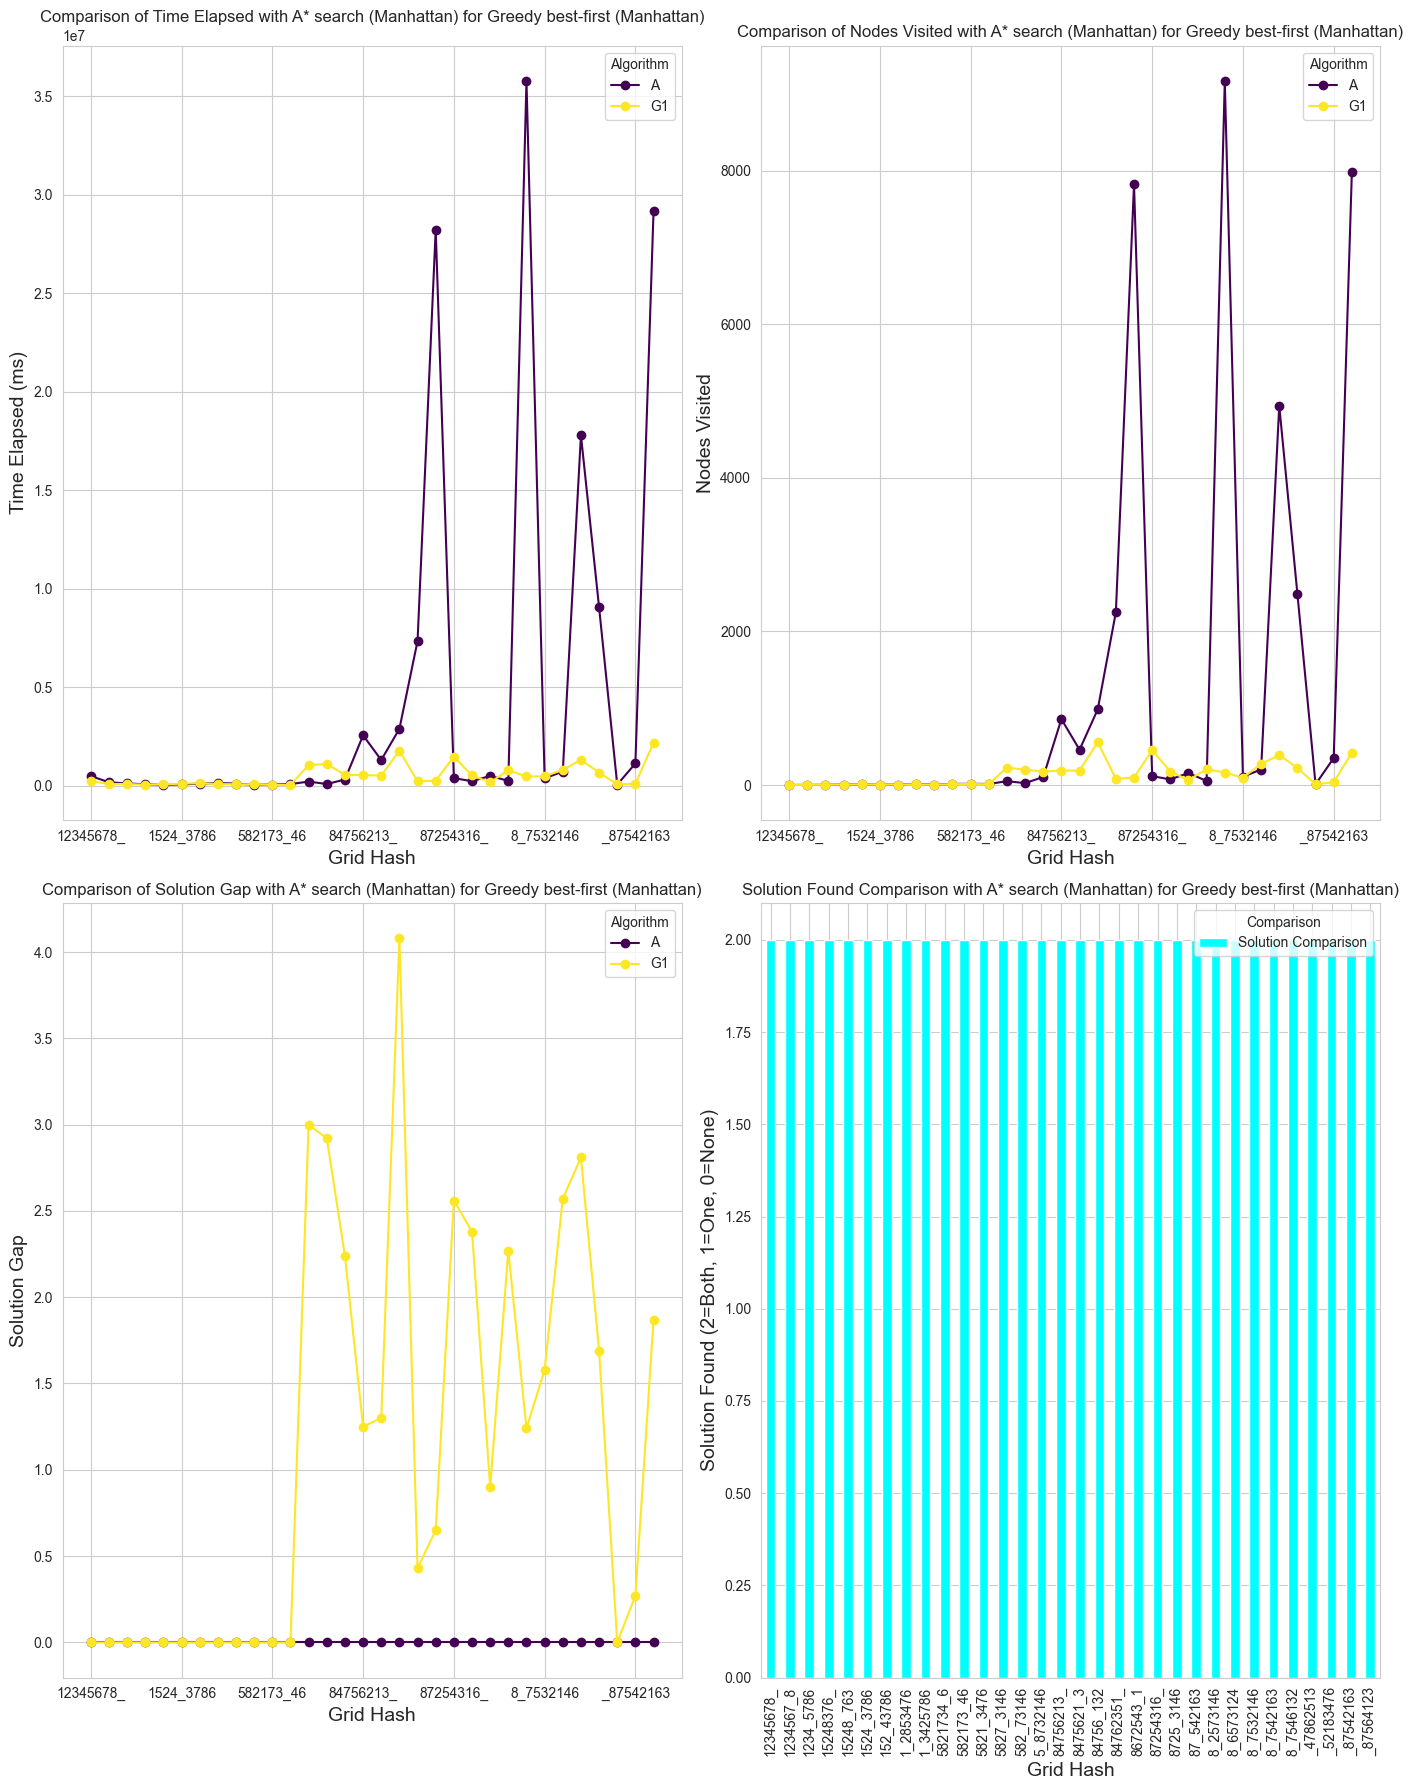

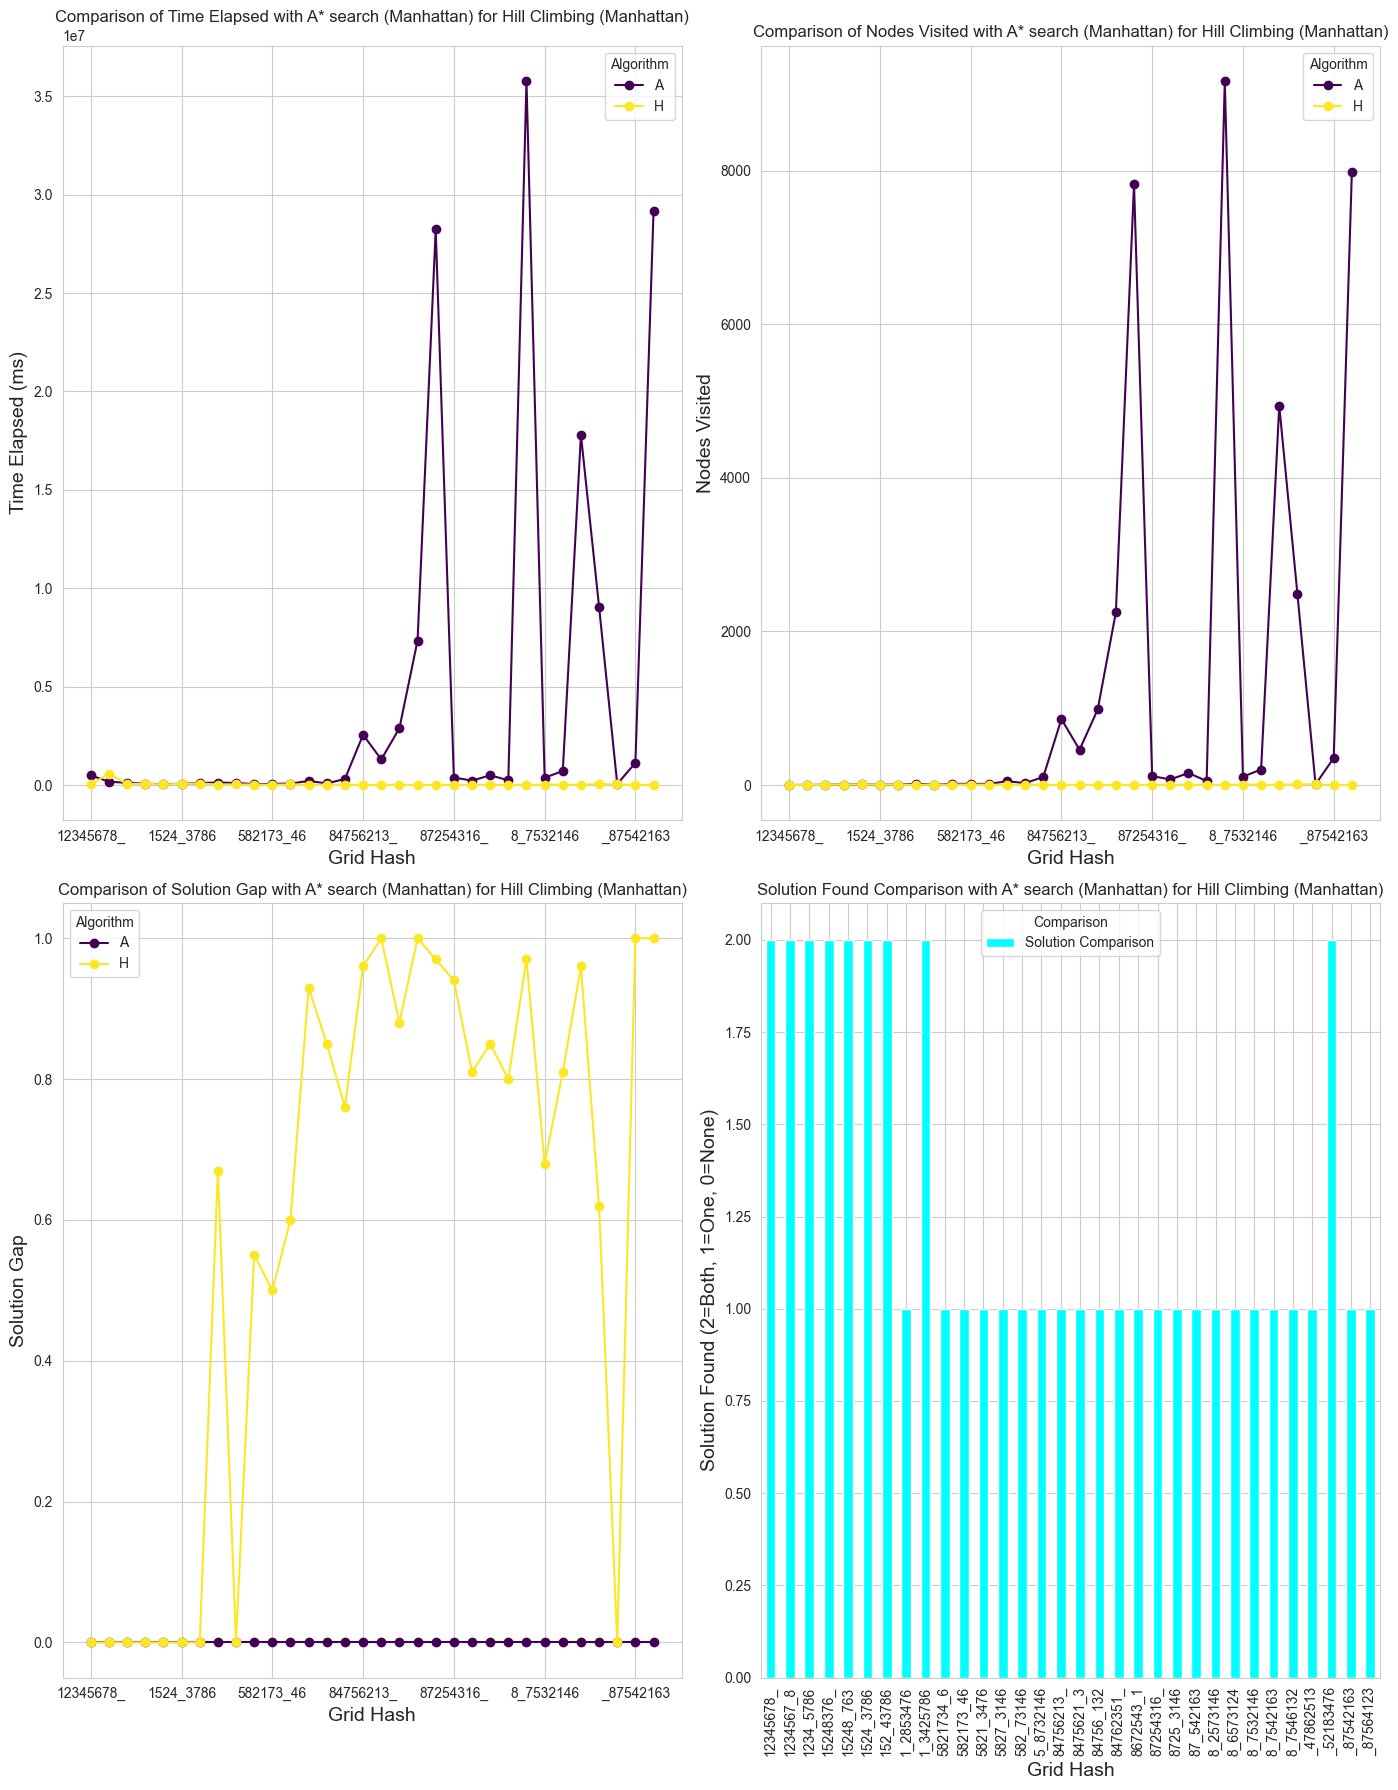

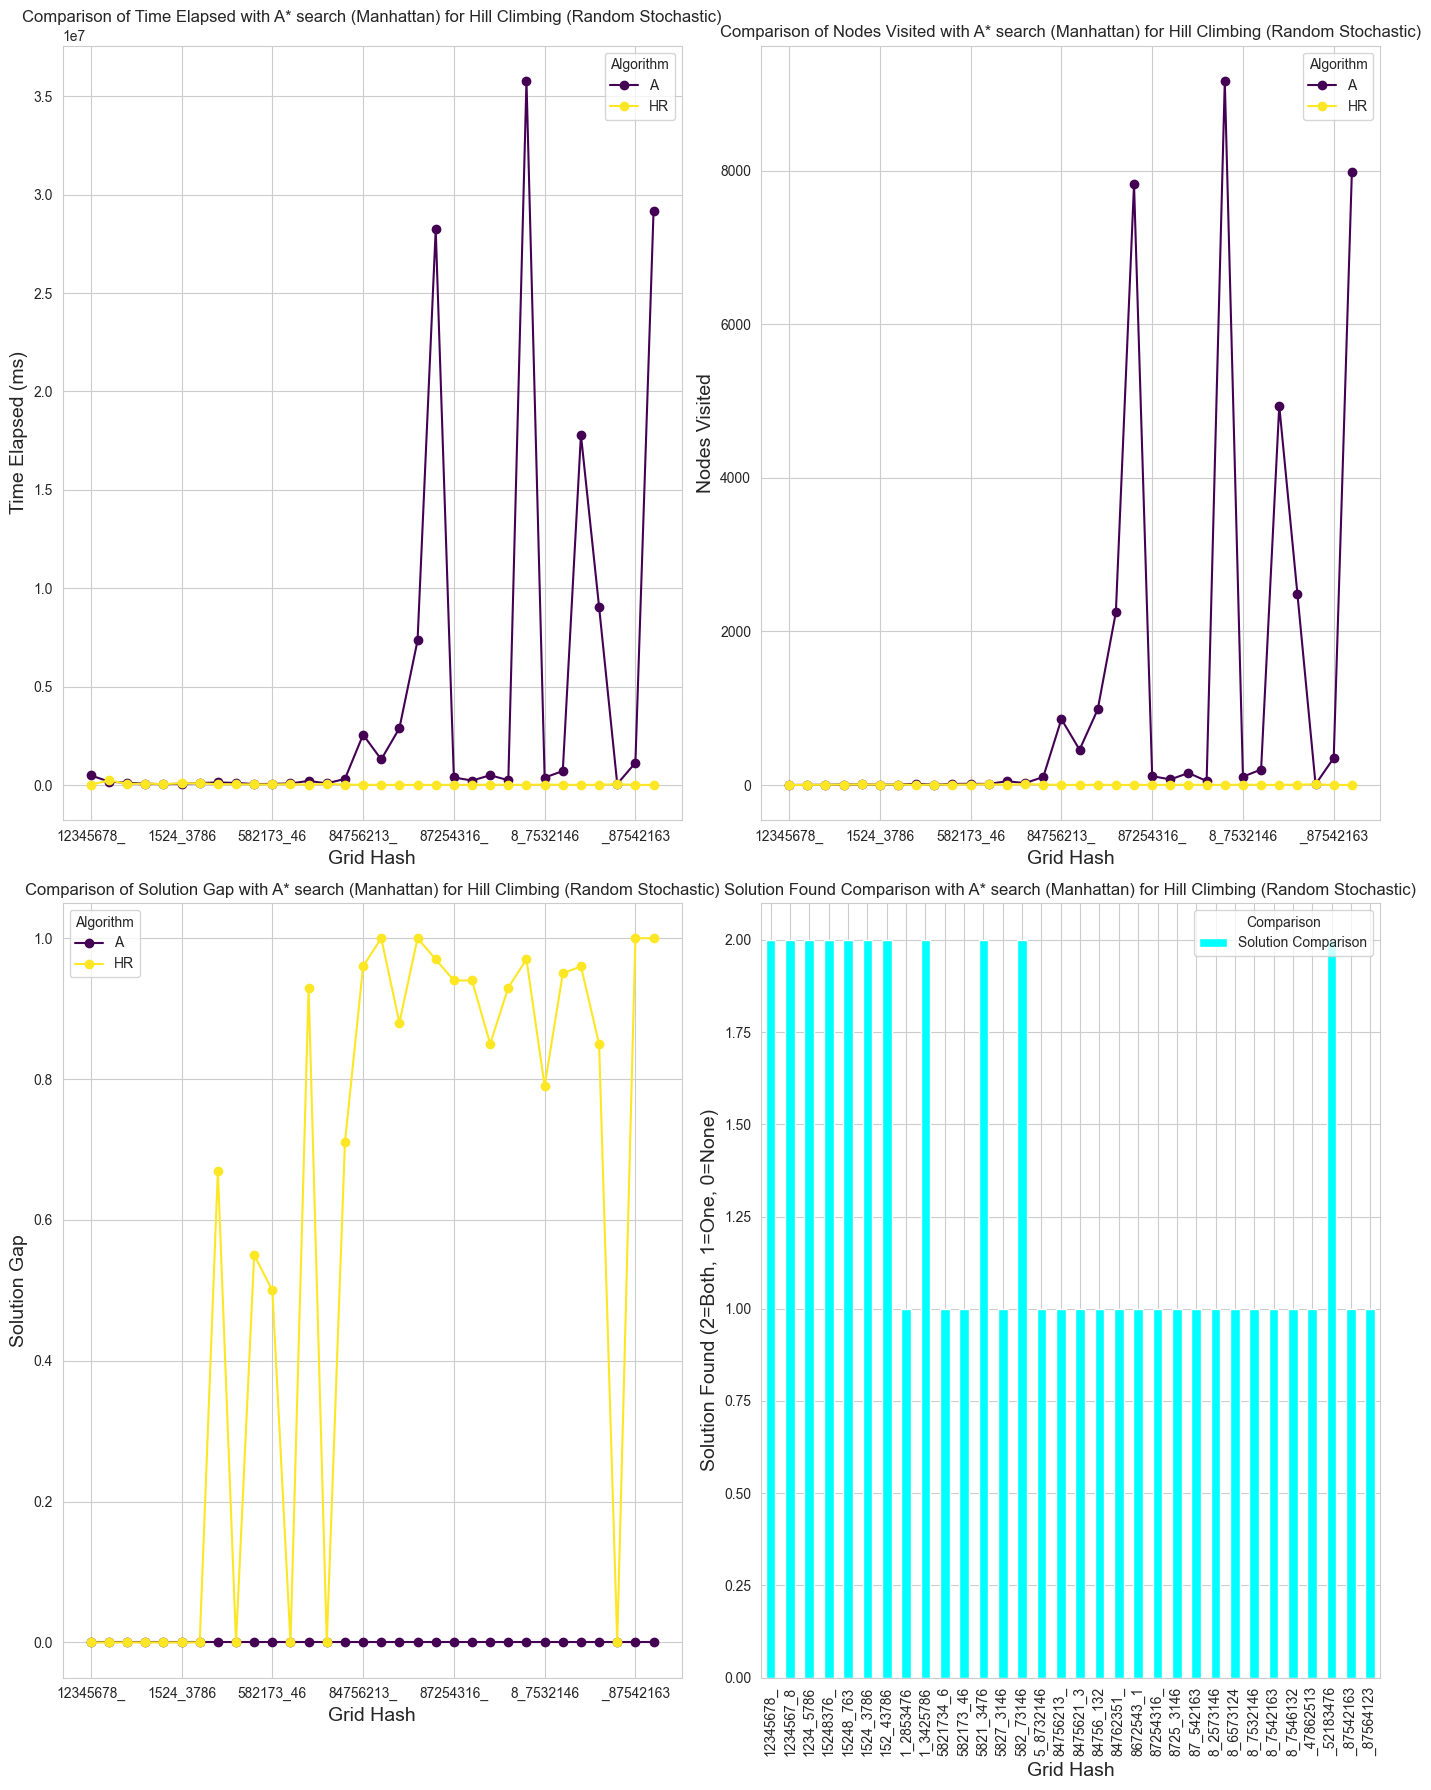

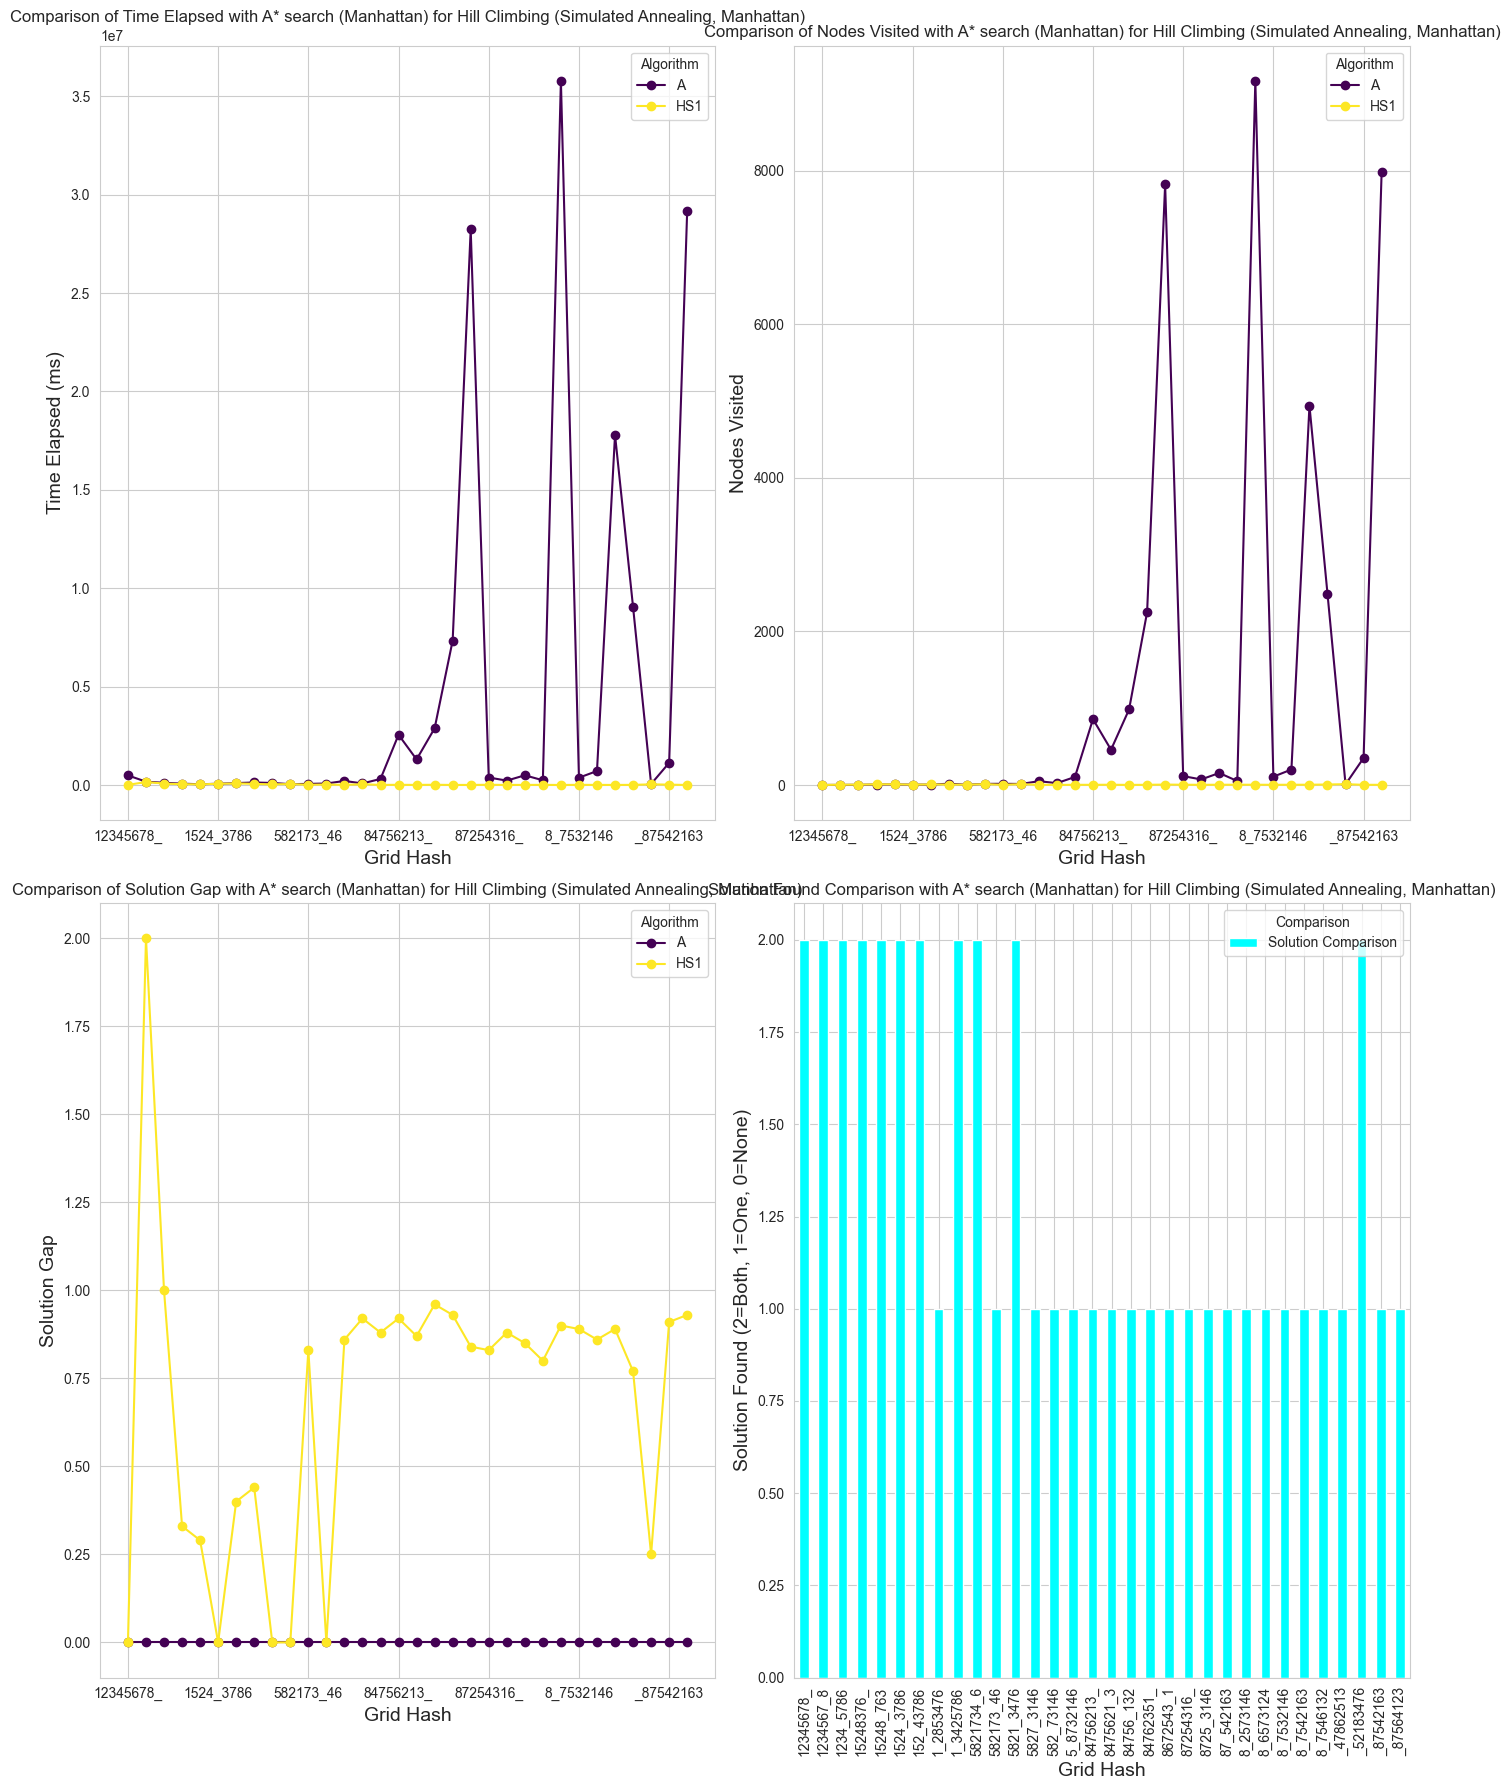

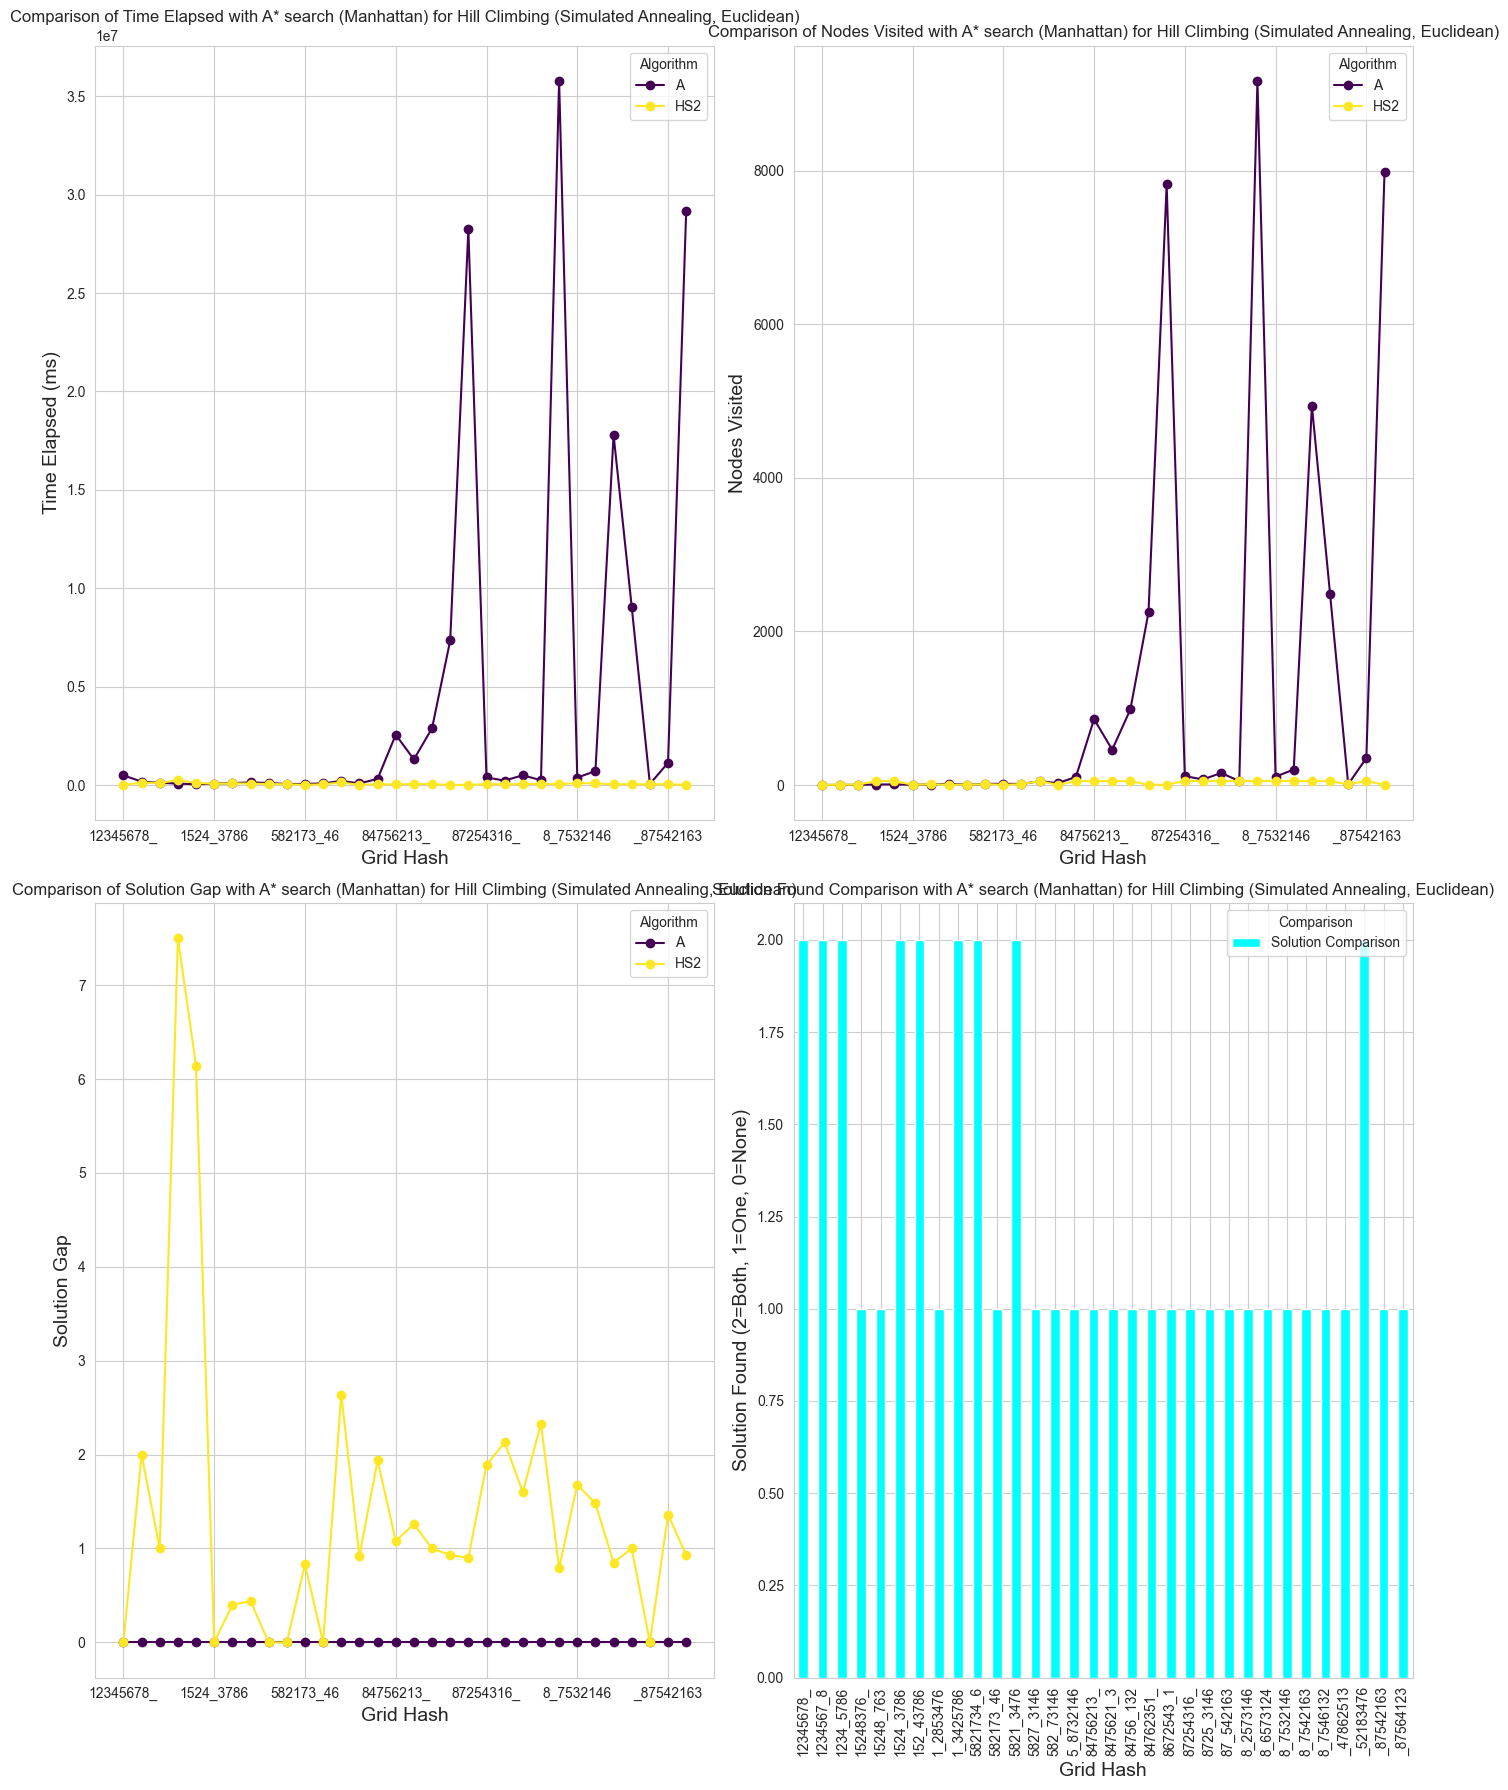

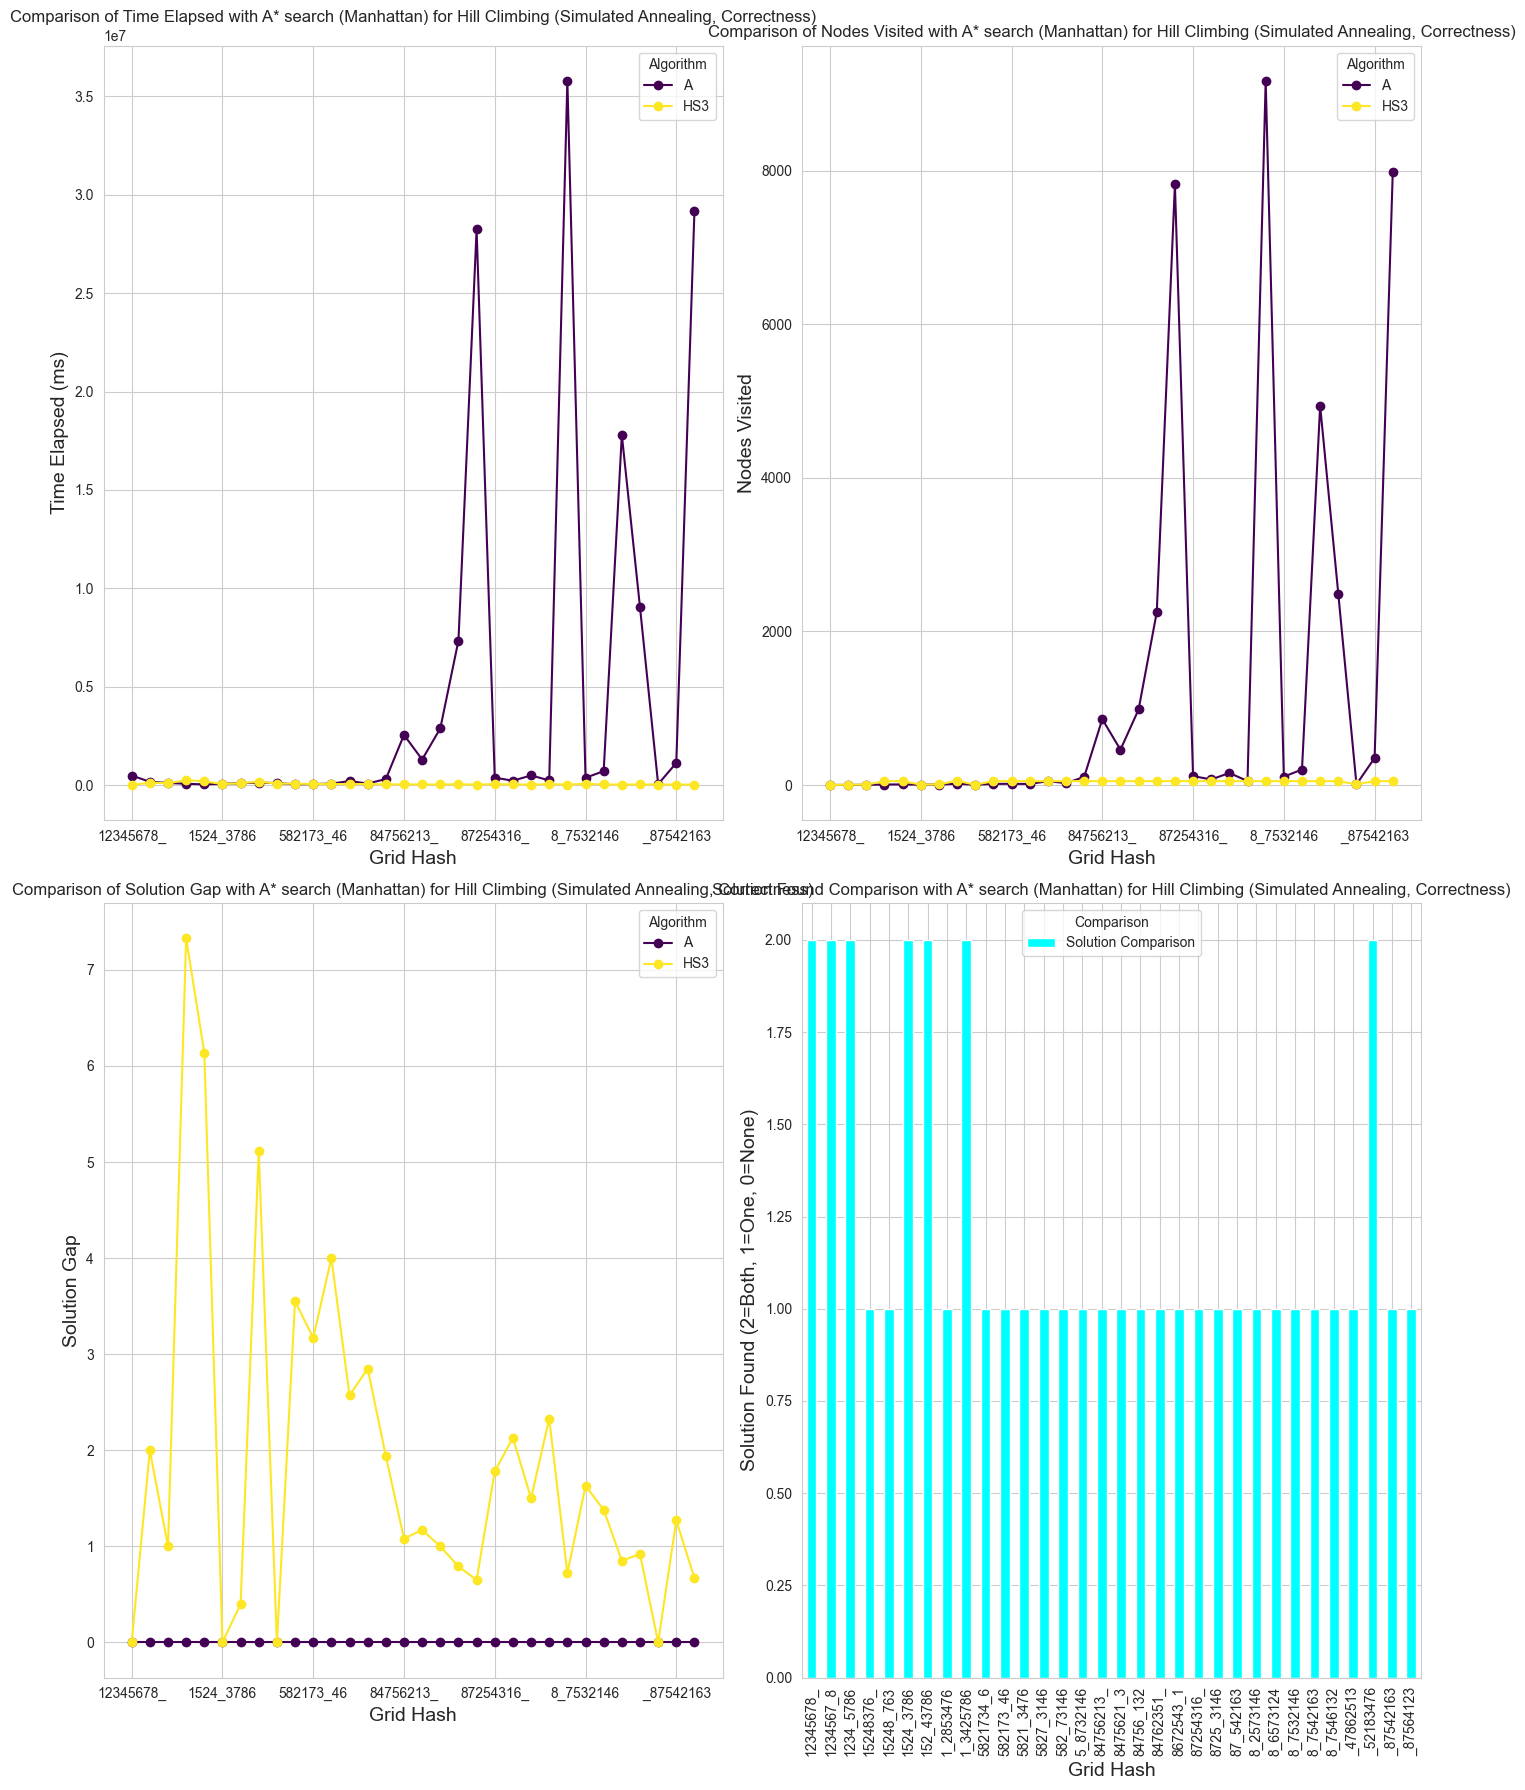

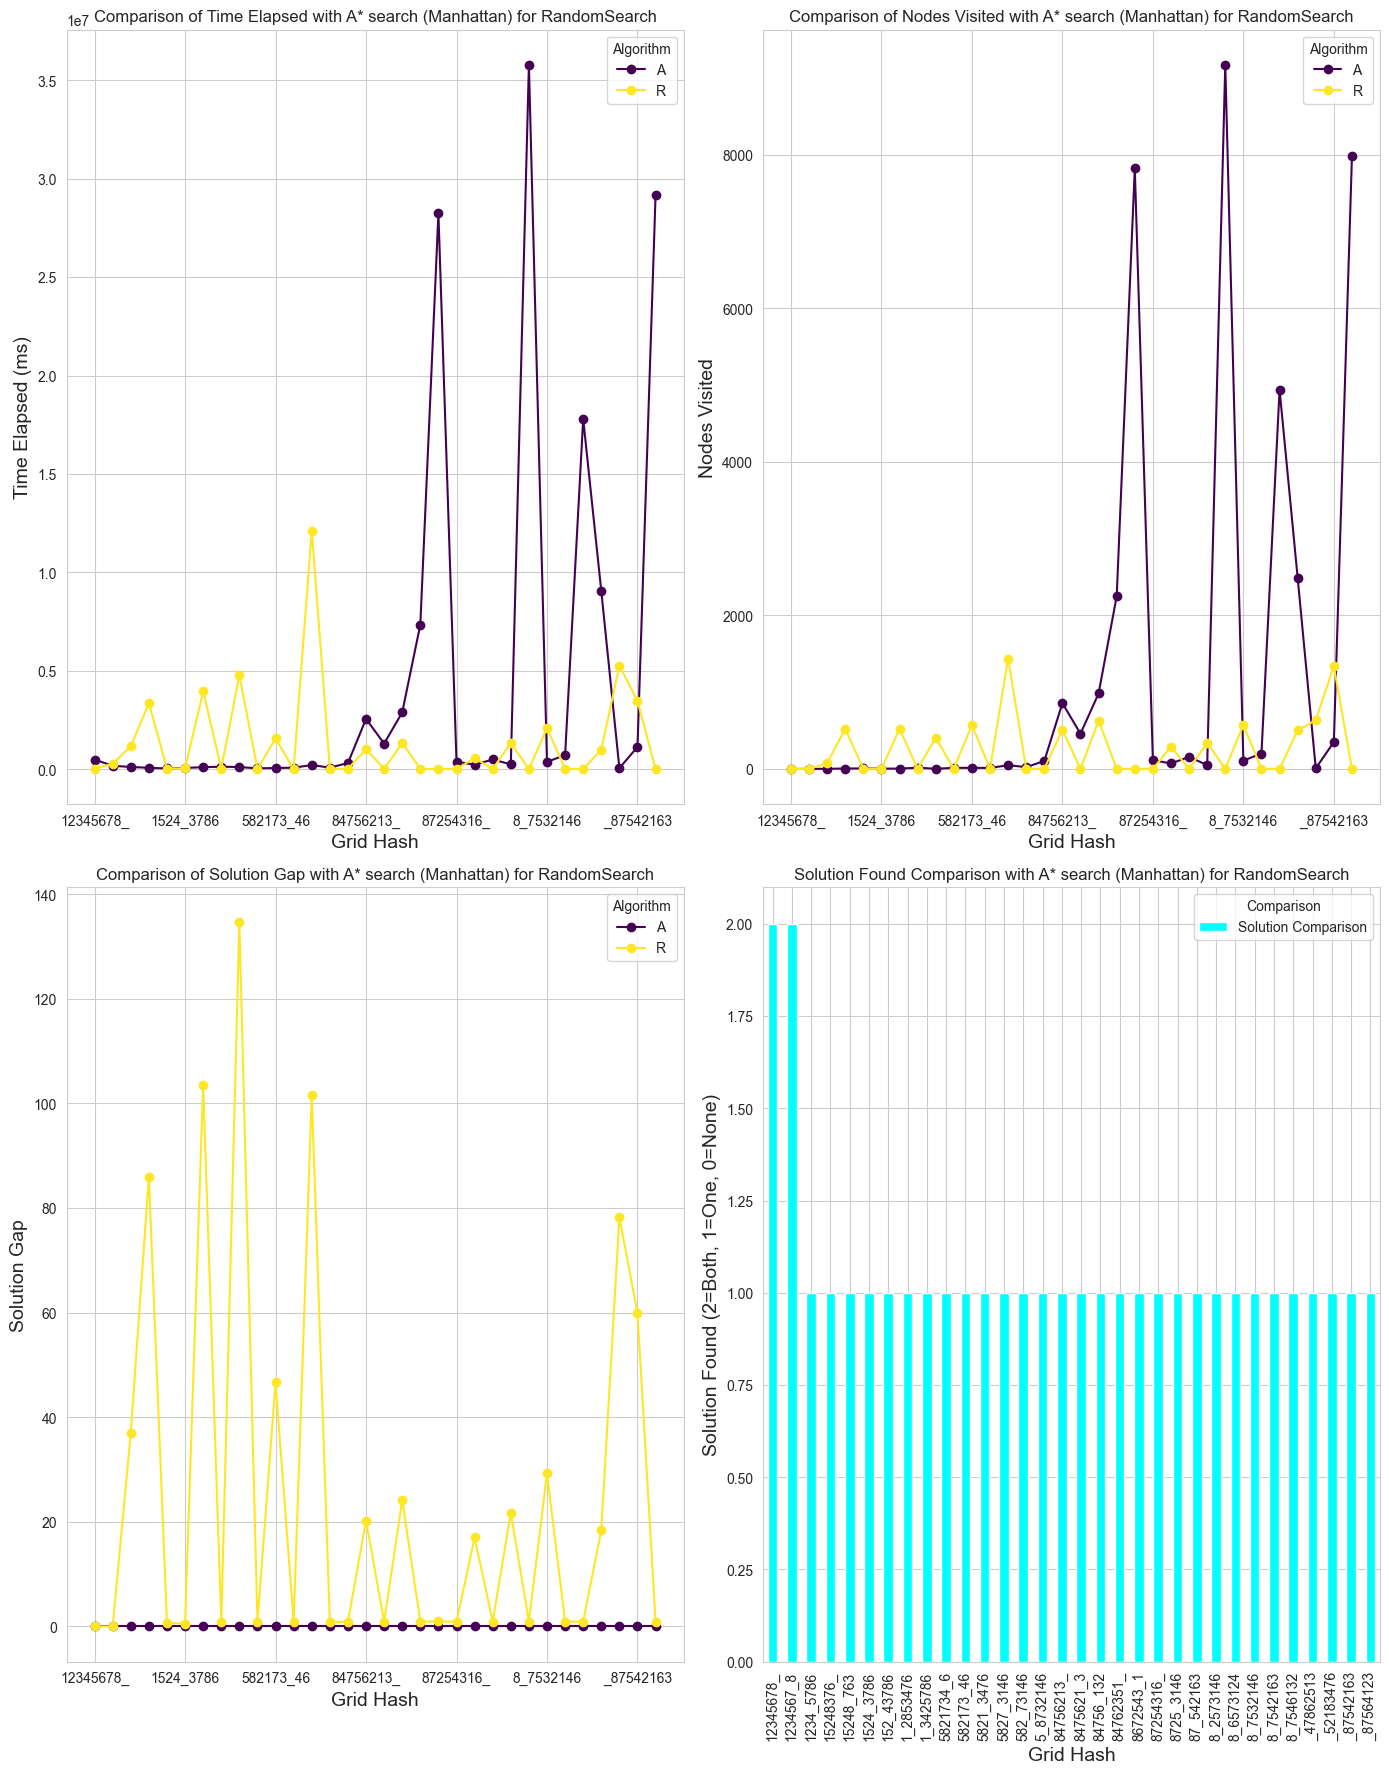

In [65]:
baseline_algorithm = 'A'
for algorithm in algorithm_categories.keys():
    if algorithm != baseline_algorithm:  # Exclude the baseline from the loop
        compare_with_baseline(algorithm, data, baseline_algorithm)


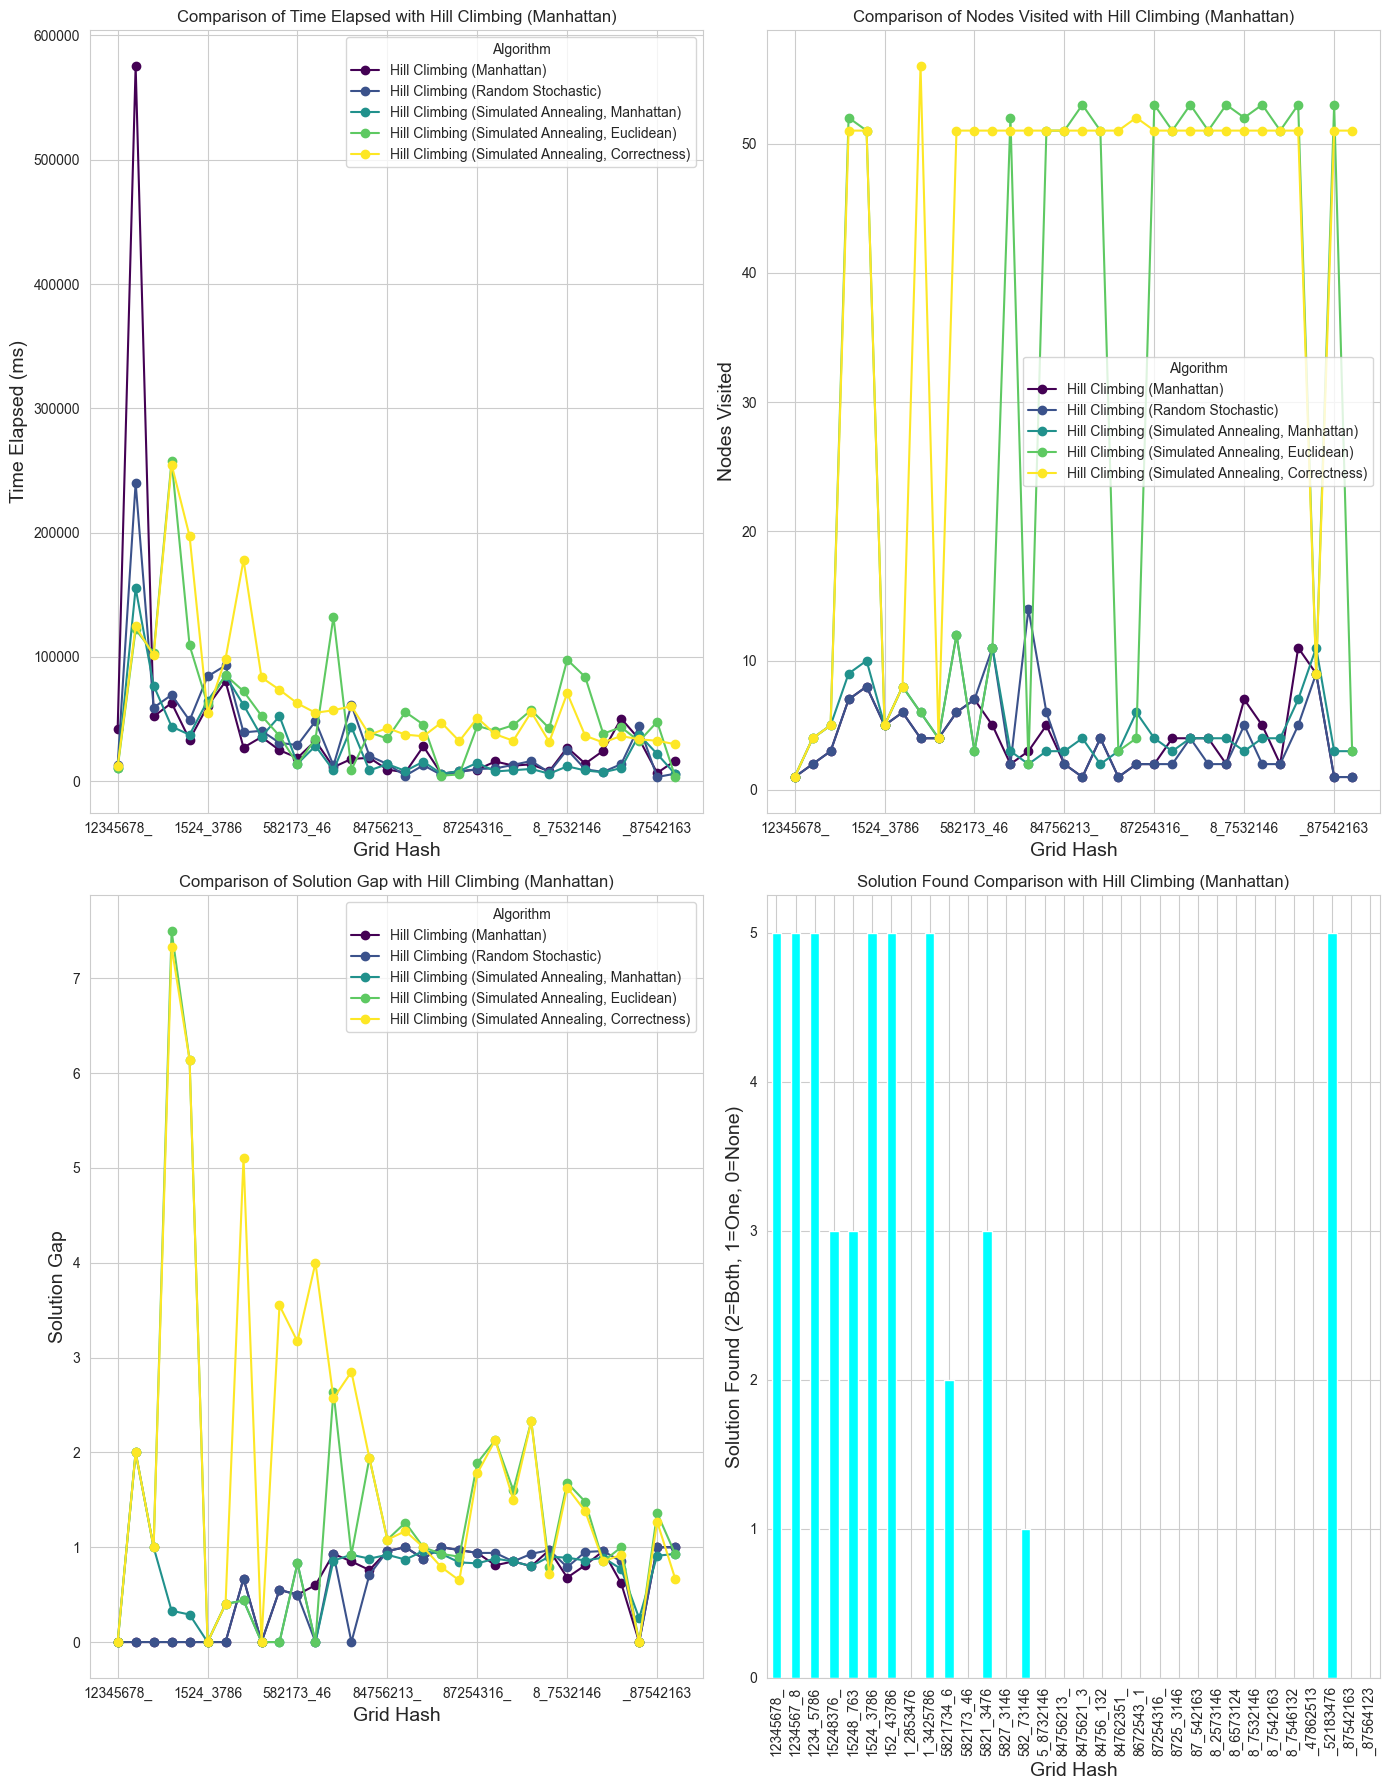

In [67]:
def compare_with_baseline(target_algorithms, data, baseline_algorithm='H'):
    algorithms = [baseline_algorithm] + target_algorithms
    filtered_data = data[data['algorithmName'].isin(algorithms)].copy()

    # Convert solutionFound to an integer representation for plotting
    # 2: Both found the solution, 1: Only one found, 0: None found
    filtered_data['solutionComparison'] = filtered_data.groupby('gridHash')['solutionFound'].transform('sum').astype(
        int)

    # Pivot data to have metrics as columns, gridHash as index, and algorithmName as values
    pivot_time = filtered_data.pivot(index='gridHash', columns='algorithmName', values='timeElapsed')
    pivot_nodes = filtered_data.pivot(index='gridHash', columns='algorithmName', values='nodesVisited')
    pivot_gap = filtered_data.pivot(index='gridHash', columns='algorithmName', values='solutionGap')

    # Rename columns to reflect algorithm names for better legend labels
    for pivot_df in [pivot_time, pivot_nodes, pivot_gap]:
        pivot_df.columns = [algorithm_categories[col] for col in pivot_df.columns]

    # Set up the figure and axes
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 18))

    # Line graph for time elapsed
    pivot_time.plot(ax=ax[0][0], marker='o', colormap='viridis')
    ax[0][0].set_title(f'Comparison of Time Elapsed with {algorithm_categories[baseline_algorithm]}', fontsize=12)
    ax[0][0].set_xlabel('Grid Hash', fontsize=14)
    ax[0][0].set_ylabel('Time Elapsed (ms)', fontsize=14)
    ax[0][0].grid(True)
    ax[0][0].legend(title='Algorithm')

    # Line graph for nodes visited
    pivot_nodes.plot(ax=ax[0][1], marker='o', colormap='viridis')
    ax[0][1].set_title(f'Comparison of Nodes Visited with {algorithm_categories[baseline_algorithm]}', fontsize=12)
    ax[0][1].set_xlabel('Grid Hash', fontsize=14)
    ax[0][1].set_ylabel('Nodes Visited', fontsize=14)
    ax[0][1].grid(True)
    ax[0][1].legend(title='Algorithm')

    # Line graph for solution gap
    pivot_gap.plot(ax=ax[1][0], marker='o', colormap='viridis')
    ax[1][0].set_title(f'Comparison of Solution Gap with {algorithm_categories[baseline_algorithm]}', fontsize=12)
    ax[1][0].set_xlabel('Grid Hash', fontsize=14)
    ax[1][0].set_ylabel('Solution Gap', fontsize=14)
    ax[1][0].grid(True)
    ax[1][0].legend(title='Algorithm')

    # Bar plot for solution comparison
    filtered_data.groupby('gridHash')['solutionComparison'].mean().plot(kind='bar', ax=ax[1][1], color='cyan')
    ax[1][1].set_title(f'Solution Found Comparison with {algorithm_categories[baseline_algorithm]}', fontsize=12)
    ax[1][1].set_xlabel('Grid Hash', fontsize=14)
    ax[1][1].set_ylabel('Solution Found (2=Both, 1=One, 0=None)', fontsize=14)
    ax[1][1].grid(True)

    plt.tight_layout()
    plt.show()


hill_climbing_variants = ['HR', 'HS1', 'HS2', 'HS3']

compare_with_baseline(hill_climbing_variants, data)


In [68]:
# Group by algorithmName and filter for algorithms that found a solution for all grid hashes
algorithms_always_solved = data.groupby('algorithmName').filter(
    lambda x: x['solutionFound'].sum() == len(x['gridHash'].unique()))

# Extract unique algorithm names from the filtered data
unique_algorithms = algorithms_always_solved['algorithmName'].unique()

unique_algorithms

array(['B', 'I', 'U', 'A', 'A1', 'A2', 'G', 'G1'], dtype=object)

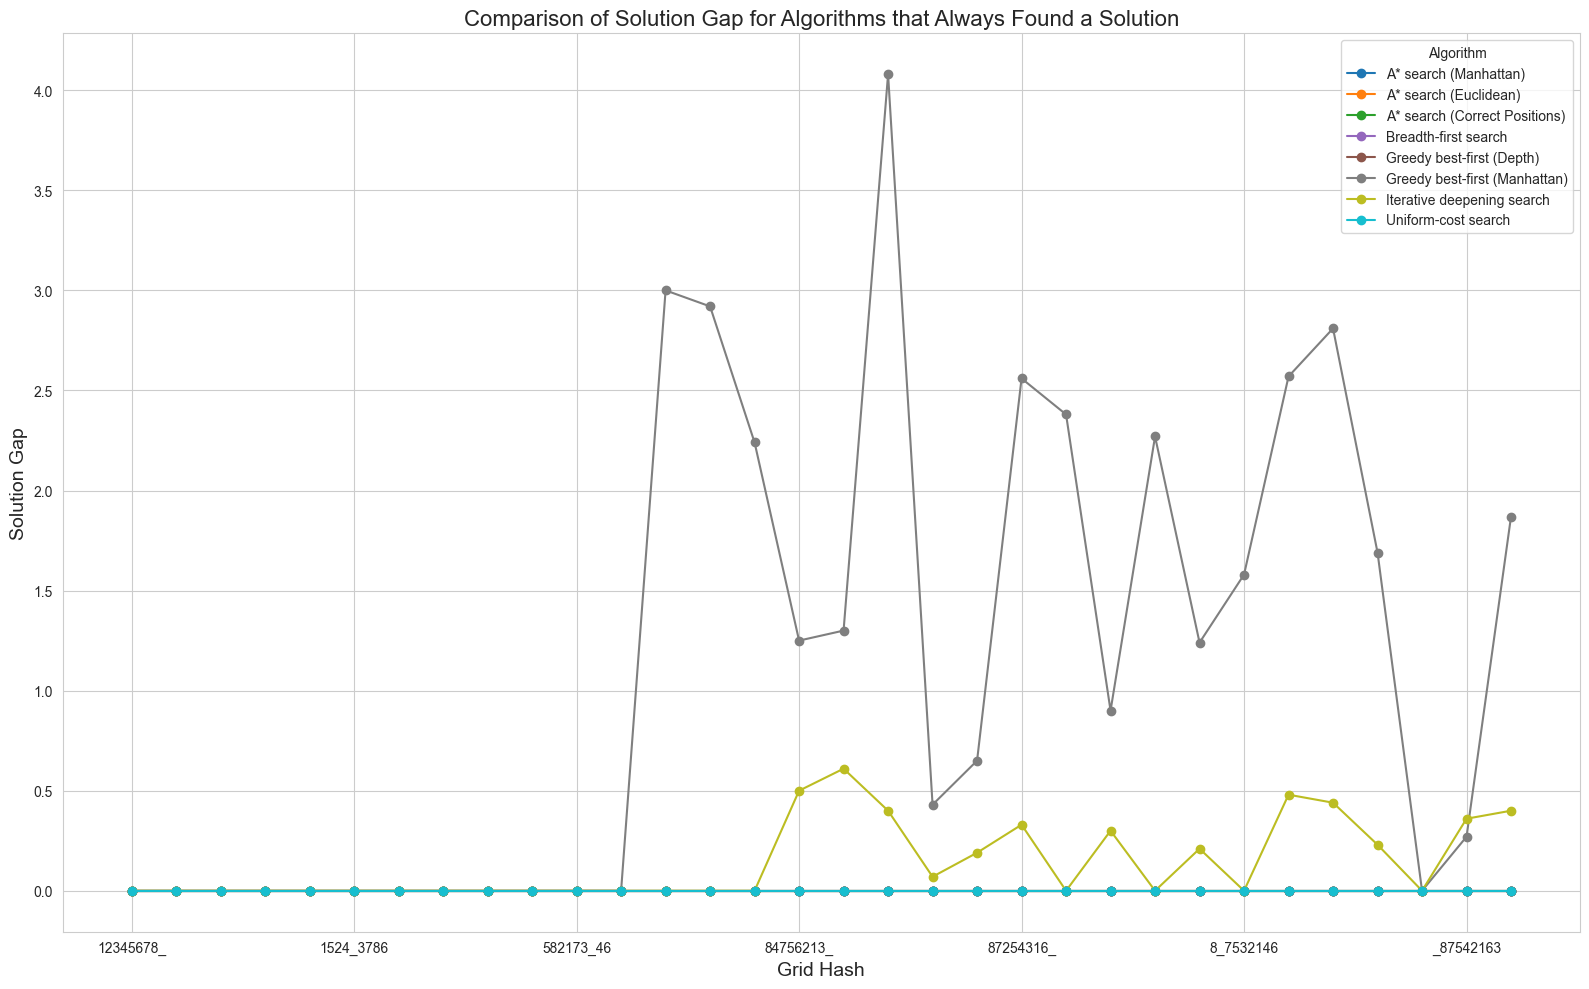

In [70]:
# Filter data for the algorithms that always found a solution
filtered_data_always_solved = data[data['algorithmName'].isin(unique_algorithms)]

# Pivot data to have metrics as columns, gridHash as index, and algorithmName as values
pivot_gap_always_solved = filtered_data_always_solved.pivot(index='gridHash', columns='algorithmName',
                                                            values='solutionGap')

pivot_gap_always_solved.columns = [algorithm_categories[col] for col in pivot_gap_always_solved.columns]

# Set up the figure and axes
plt.figure(figsize=(16, 10))

# Line graph for solution gap
pivot_gap_always_solved.plot(ax=plt.gca(), marker='o', colormap='tab10')
plt.title('Comparison of Solution Gap for Algorithms that Always Found a Solution', fontsize=16)
plt.xlabel('Grid Hash', fontsize=14)
plt.ylabel('Solution Gap', fontsize=14)
plt.grid(True)
plt.legend(title='Algorithm')

plt.tight_layout()
plt.show()
